In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import sys

# Process User View Data

In [ ]:
extra_user_view = pd.read_csv('dataset/extra_user_view.txt', names=['user_id', 'shop_id', 'time_stamp'],
                              parse_dates=[2])
extra_user_view

In [ ]:
user_view = pd.read_csv('dataset/user_view.txt', names=['user_id', 'shop_id', 'time_stamp'],
                        parse_dates=[2])
user_view

In [ ]:
user_view = pd.concat([extra_user_view, user_view], ignore_index=True)
user_view

In [ ]:
# dates = user_view['time_stamp']
# print(type(dates.values[0]))

In [ ]:
# dates = dates.apply(lambda d: d.strftime('%Y-%m-%d'))
# dates = pd.to_datetime(dates)
# dates


In [ ]:
# user_view['time_stamp'] = dates
# user_view

In [ ]:
# user_view = user_view.sort_values(by=['shop_id', 'time_stamp'])
# user_view

In [ ]:
shop_id_set = set(user_view.shop_id.values)
print(len(shop_id_set))
# shop_id_set

In [ ]:
set(range(1, 2001)) - shop_id_set
    

In [ ]:
user_view.shop_id.value_counts()

In [ ]:
shop_4 = user_view.loc[user_view['shop_id']==4]
shop_4.empty


In [ ]:
shop_1 = user_view.loc[user_view['shop_id']==1]
shop_1

In [ ]:
shop_1_date_count = shop_1.time_stamp.value_counts().sort_index()
shop_1_date_count

In [ ]:
# shop_1_date_count.index.tolist()

In [ ]:
# multi_index = pd.MultiIndex.from_product([[1], xrange(len(shop_1_date_count))])
# multi_index
# df_shop_1 = pd.DataFrame(np.stack([shop_1_date_count.index.values, shop_1_date_count.values], axis=1),
#                          columns=['time_stamp', 'user_view_cnt'])
# df_shop_1.set_index(multi_index, drop=True, inplace=True)
# df_shop_1

In [ ]:
shop_id_list = range(1, 20)
# keys = []
shop_df_list = []
for shop_id in shop_id_list:
    each_shop_user_view = user_view.loc[user_view['shop_id']==shop_id].copy()
    dates = each_shop_user_view['time_stamp']
    dates = dates.apply(lambda d: d.strftime('%Y-%m-%d'))
    each_shop_user_view.loc[:, ('time_stamp')] = dates
    if each_shop_user_view.empty:
        shop_df_list.append(pd.DataFrame(columns=['time_stamp', 'user_view_cnt']))
    else:
        _date_counts = each_shop_user_view.time_stamp.value_counts().sort_index()
#         print(_date_counts)
        _df_each_shop = pd.DataFrame(np.stack([_date_counts.index.values, _date_counts.values], axis=1),
                                     columns=['time_stamp', 'user_view_cnt'])
#         _df_each_shop = pd.DataFrame(_date_counts)
        shop_df_list.append(_df_each_shop)
#     keys.append(shop_id)

new_df_user_views = pd.concat(objs=shop_df_list, keys=shop_id_list, names=['shop_id', 'idx'])
new_df_user_views
# _date_counts


In [ ]:
print(type(_date_counts))
pd.DataFrame(_date_counts)

In [ ]:
new_df_user_views.loc[247]

In [ ]:
new_df_user_views.to_csv('dataset/user_views_df.txt')

>In 2000 shops, there are 3 shops lacking user-views data :{247, 367, 1752}

# Process User Pay Data

In [ ]:
user_pay = pd.read_csv('dataset/user_pay.txt', names=['user_id', 'shop_id', 'time_stamp'],
                      parse_dates=[2])
user_pay

In [ ]:
# dates = user_pay['time_stamp']
# print(type(dates.values[0]))
# dates = dates.apply(lambda d: d.strftime('%Y-%m-%d'))

In [ ]:
# user_pay['time_stamp'] = dates
# user_pay

In [ ]:
len(set(user_pay.shop_id.values))


In [ ]:
shop_id_list = range(1, 2001)
# keys = []
shop_df_list = []
for shop_id in shop_id_list:
    sys.stdout.write('\rprocessing id: {}'.format(shop_id))
    each_shop_user_view = user_pay.loc[user_pay['shop_id']==shop_id].copy()
    dates = each_shop_user_view['time_stamp']
    dates = dates.apply(lambda d: d.strftime('%Y-%m-%d'))
    each_shop_user_view.loc[:, ('time_stamp')] = dates
    if each_shop_user_view.empty:
        shop_df_list.append(pd.DataFrame(columns=['time_stamp', 'user_pay_cnt']))
    else:
        _date_counts = each_shop_user_view.time_stamp.value_counts().sort_index()
        _df_each_shop = pd.DataFrame(np.stack([_date_counts.index.values, _date_counts.values], axis=1),
                                     columns=['time_stamp', 'user_pay_cnt'])
        shop_df_list.append(_df_each_shop)
#     keys.append(shop_id)

new_df_user_pay = pd.concat(objs=shop_df_list, keys=shop_id_list, names=['shop_id', 'idx'])
new_df_user_pay

In [ ]:
new_df_user_pay.to_csv('dataset/user_pay_df.txt')

# CHECKPOINT

In [347]:
import pandas as pd
from collections import Counter
import numpy as np
import sys

## Concatate users view and pay together

In [377]:
df_user_view = pd.read_csv('dataset/user_views_df.txt', index_col=[0, 1])
df_user_view

time_stamp  user_view_cnt
shop_id idx                           
1       0    2016-02-01              6
        1    2016-02-02              9
        2    2016-02-03              6
        3    2016-02-04              8
        4    2016-02-05              6
        5    2016-02-06              1
        6    2016-02-07              4
        7    2016-02-08              8
        8    2016-02-09              6
        9    2016-02-10              4
        10   2016-02-11              6
        11   2016-02-12              8
        12   2016-02-13              1
        13   2016-02-14              3
        14   2016-02-15              8
        15   2016-02-16              9
        16   2016-02-17              3
        17   2016-02-18              3
        18   2016-02-19              8
        19   2016-02-20              1
        20   2016-02-21              3
        21   2016-02-22              5
        22   2016-02-23              4
        23   2016-02-24              1
        24   2016-02-25              4
        25   2016-02-26              7
        26   2016-02-27              3
        27   2016-02-28              5
        28   2016-02-29              7
        29   2016-03-01              5
...                 ...            ...
2000    138  2016-10-02              4
        139  2016-10-03              3
        140  2016-10-04              8
        141  2016-10-05              3
        142  2016-10-06              4
        143  2016-10-07             11
        144  2016-10-08             16
        145  2016-10-09             24
        146  2016-10-10             35
        147  2016-10-11             24
        148  2016-10-12             33
        149  2016-10-13             35
        150  2016-10-14             14
        151  2016-10-15              9
        152  2016-10-16              4
        153  2016-10-17             16
        154  2016-10-18             18
        155  2016-10-19             14
        156  2016-10-20             35
        157  2016-10-21             13
        158  2016-10-22              6
        159  2016-10-23              4
        160  2016-10-24             19
        161  2016-10-25             14
        162  2016-10-26             13
        163  2016-10-27             16
        164  2016-10-28             12
        165  2016-10-29             11
        166  2016-10-30              3
        167  2016-10-31             15

[419281 rows x 2 columns]

In [378]:
df_user_view.loc[(slice(None), 0), :]

,,time_stamp,user_view_cnt
shop_id,idx,,
1,0,2016-02-01,6
2,0,2016-02-01,244
3,0,2016-06-18,3
4,0,2016-07-19,14
5,0,2016-02-04,2
6,0,2016-02-01,4
7,0,2016-02-01,71
8,0,2016-07-29,4
9,0,2016-02-01,15


In [379]:
df_user_pay = pd.read_csv('dataset/user_pay_df.txt', index_col=[0, 1])
df_user_pay

time_stamp  user_pay_cnt
shop_id idx                          
1       0    2015-10-10           188
        1    2015-10-11           272
        2    2015-10-12           257
        3    2015-10-13           239
        4    2015-10-14           277
        5    2015-10-15           227
        6    2015-10-16           242
        7    2015-10-17           293
        8    2015-10-18           291
        9    2015-10-19           256
        10   2015-10-20           262
        11   2015-10-21           271
        12   2015-10-22           260
        13   2015-10-23           240
        14   2015-10-24           291
        15   2015-10-25           286
        16   2015-10-26           264
        17   2015-10-27           295
        18   2015-10-28           310
        19   2015-10-29           212
        20   2015-10-30           331
        21   2015-10-31           347
        22   2015-11-01           381
        23   2015-11-02           332
        24   2015-11-03           404
        25   2015-11-04           392
        26   2015-11-05           496
        27   2015-11-06           430
        28   2015-11-07           351
        29   2015-11-08           288
...                 ...           ...
2000    145  2016-10-02            39
        146  2016-10-03            50
        147  2016-10-04            29
        148  2016-10-05            35
        149  2016-10-06            76
        150  2016-10-07            68
        151  2016-10-08           158
        152  2016-10-09           176
        153  2016-10-10           161
        154  2016-10-11           163
        155  2016-10-12           159
        156  2016-10-13           177
        157  2016-10-14           148
        158  2016-10-15            78
        159  2016-10-16            60
        160  2016-10-17           163
        161  2016-10-18           157
        162  2016-10-19           164
        163  2016-10-20           165
        164  2016-10-21           138
        165  2016-10-22            66
        166  2016-10-23            59
        167  2016-10-24           162
        168  2016-10-25           181
        169  2016-10-26           184
        170  2016-10-27           132
        171  2016-10-28           133
        172  2016-10-29            67
        173  2016-10-30            67
        174  2016-10-31           168

[599275 rows x 2 columns]

In [380]:
df_user_pay.loc[(slice(None), 0), :]

,,time_stamp,user_pay_cnt
shop_id,idx,,
1,0,2015-10-10,188
2,0,2015-11-25,55
3,0,2016-06-18,71
4,0,2016-07-19,74
5,0,2015-09-28,58
6,0,2016-01-22,6
7,0,2015-06-28,1
8,0,2016-08-01,81
9,0,2015-10-30,57


In [381]:
shop_1_view = df_user_view.loc[5]
shop_1_view

,time_stamp,user_view_cnt
idx,,
0,2016-02-04,2
1,2016-02-18,2
2,2016-02-21,1
3,2016-02-22,1
4,2016-02-23,1
5,2016-02-25,1
6,2016-02-27,2
7,2016-02-28,1
8,2016-02-29,2


In [382]:
shop_1_pay = df_user_pay.loc[5]
shop_1_pay

,time_stamp,user_pay_cnt
idx,,
0,2015-09-28,58
1,2015-09-29,98
2,2015-09-30,138
3,2015-10-01,51
4,2015-10-02,85
5,2015-10-03,54
6,2015-10-04,91
7,2015-10-05,82
8,2015-10-06,106


In [383]:
set1 = set(shop_1_view.time_stamp.values)
set2 = set(shop_1_pay.time_stamp.values)
print(len(set1 & set2))
set1 & set2 == set1
set1 - (set1 & set2)

124


{'2016-02-04',
 '2016-02-18',
 '2016-02-21',
 '2016-02-22',
 '2016-02-23',
 '2016-02-25',
 '2016-02-27',
 '2016-02-28',
 '2016-02-29',
 '2016-03-01',
 '2016-03-02',
 '2016-03-03',
 '2016-03-05',
 '2016-03-06',
 '2016-03-12',
 '2016-03-17',
 '2016-03-18',
 '2016-03-21',
 '2016-04-06',
 '2016-04-08',
 '2016-04-09',
 '2016-04-10',
 '2016-04-11',
 '2016-04-12',
 '2016-04-13',
 '2016-04-14',
 '2016-04-15',
 '2016-04-16',
 '2016-04-17',
 '2016-04-23',
 '2016-04-24',
 '2016-04-25',
 '2016-04-26',
 '2016-04-27',
 '2016-04-28',
 '2016-04-30',
 '2016-05-01',
 '2016-07-03',
 '2016-07-04',
 '2016-07-05',
 '2016-07-06',
 '2016-07-07',
 '2016-07-09',
 '2016-07-13',
 '2016-07-17',
 '2016-07-19',
 '2016-07-23',
 '2016-08-01',
 '2016-08-02',
 '2016-08-07',
 '2016-09-03',
 '2016-09-06',
 '2016-09-11',
 '2016-09-12',
 '2016-09-13',
 '2016-10-27'}

In [384]:
set_c = set1 | set2
set_c

{'2015-09-28',
 '2015-09-29',
 '2015-09-30',
 '2015-10-01',
 '2015-10-02',
 '2015-10-03',
 '2015-10-04',
 '2015-10-05',
 '2015-10-06',
 '2015-10-07',
 '2015-10-08',
 '2015-10-09',
 '2015-10-10',
 '2015-10-11',
 '2015-10-12',
 '2015-10-13',
 '2015-10-14',
 '2015-10-15',
 '2015-10-16',
 '2015-10-17',
 '2015-10-18',
 '2015-10-19',
 '2015-10-20',
 '2015-10-21',
 '2015-10-22',
 '2015-10-25',
 '2015-10-26',
 '2015-10-29',
 '2015-10-30',
 '2015-10-31',
 '2015-11-01',
 '2015-11-02',
 '2015-11-03',
 '2015-11-04',
 '2015-11-05',
 '2015-11-06',
 '2015-11-07',
 '2015-11-08',
 '2015-11-09',
 '2015-11-10',
 '2015-11-11',
 '2015-11-12',
 '2015-11-13',
 '2015-11-14',
 '2015-11-15',
 '2015-11-16',
 '2015-11-17',
 '2015-11-18',
 '2015-11-19',
 '2015-11-20',
 '2015-11-21',
 '2015-11-22',
 '2015-11-23',
 '2015-11-24',
 '2015-11-25',
 '2015-11-26',
 '2015-11-27',
 '2015-11-28',
 '2015-11-29',
 '2015-11-30',
 '2015-12-01',
 '2015-12-02',
 '2015-12-03',
 '2015-12-04',
 '2015-12-05',
 '2015-12-06',
 '2015-12-

In [385]:
t_c = list(set_c)
t_c.sort()
new_df = pd.DataFrame(t_c, columns=['time_stamp'])
new_df['view_cnt'] = 0
new_df['pay_cnt'] = 0
new_df

,time_stamp,view_cnt,pay_cnt
0,2015-09-28,0,0
1,2015-09-29,0,0
2,2015-09-30,0,0
3,2015-10-01,0,0
4,2015-10-02,0,0
5,2015-10-03,0,0
6,2015-10-04,0,0
7,2015-10-05,0,0
8,2015-10-06,0,0
9,2015-10-07,0,0


In [386]:
shop_1_pay

,time_stamp,user_pay_cnt
idx,,
0,2015-09-28,58
1,2015-09-29,98
2,2015-09-30,138
3,2015-10-01,51
4,2015-10-02,85
5,2015-10-03,54
6,2015-10-04,91
7,2015-10-05,82
8,2015-10-06,106


In [387]:
full_day = set(pd.date_range(shop_1_pay.time_stamp.values[0], shop_1_pay.time_stamp.values[-1]))
full_day

{Timestamp('2015-09-28 00:00:00', freq='D'),
 Timestamp('2015-09-29 00:00:00', freq='D'),
 Timestamp('2015-09-30 00:00:00', freq='D'),
 Timestamp('2015-10-01 00:00:00', freq='D'),
 Timestamp('2015-10-02 00:00:00', freq='D'),
 Timestamp('2015-10-03 00:00:00', freq='D'),
 Timestamp('2015-10-04 00:00:00', freq='D'),
 Timestamp('2015-10-05 00:00:00', freq='D'),
 Timestamp('2015-10-06 00:00:00', freq='D'),
 Timestamp('2015-10-07 00:00:00', freq='D'),
 Timestamp('2015-10-08 00:00:00', freq='D'),
 Timestamp('2015-10-09 00:00:00', freq='D'),
 Timestamp('2015-10-10 00:00:00', freq='D'),
 Timestamp('2015-10-11 00:00:00', freq='D'),
 Timestamp('2015-10-12 00:00:00', freq='D'),
 Timestamp('2015-10-13 00:00:00', freq='D'),
 Timestamp('2015-10-14 00:00:00', freq='D'),
 Timestamp('2015-10-15 00:00:00', freq='D'),
 Timestamp('2015-10-16 00:00:00', freq='D'),
 Timestamp('2015-10-17 00:00:00', freq='D'),
 Timestamp('2015-10-18 00:00:00', freq='D'),
 Timestamp('2015-10-19 00:00:00', freq='D'),
 Timestamp

In [388]:
part_day = set(pd.to_datetime(shop_1_pay.time_stamp.values).values)

In [389]:
part_day & full_day == part_day

False

In [390]:
pd.to_datetime('2015-07-02') > pd.to_datetime('2015-07-01')

True

In [391]:
new_df_list = []
shop_id_list = range(1, 2001)
for ID in shop_id_list:
    sys.stdout.write('\rProcessing ID: {}'.format(ID))
    try:
        _df_view = df_user_view.loc[ID].copy()
    except KeyError:
        _df_view = pd.DataFrame([], columns=['time_stamp', 'user_view_cnt'])
    try:
        _df_pay = df_user_pay.loc[ID].copy()
    except KeyError:
        _df_pay = pd.DataFrame([], columns=['time_stamp', 'user_pay_cnt'])
#     print(_df_pay)
    _set1 = set(pd.to_datetime(_df_view.time_stamp.values))
    _set2 = set(pd.to_datetime(_df_pay.time_stamp.values))
    _time_stamp = list(_set1 | _set2)
    _time_stamp.sort()
    _s_date = _time_stamp[0] if _time_stamp[0] > pd.to_datetime('2015-07-01') else pd.to_datetime('2015-07-01')
    _time_stamp = pd.date_range(_s_date, _time_stamp[-1])
    _df = pd.DataFrame(_time_stamp, columns=['time_stamp'])
    _df['view_cnt'] = 0
    _df['pay_cnt'] = 0
    i, j = 0, 0
    for idx, _time in enumerate(_time_stamp):
        if _time in _set1:
            _df.loc[idx, ('view_cnt')] = _df_view.loc[i, 'user_view_cnt']
            i += 1
        if _time in _set2:
            _df.loc[idx, ('pay_cnt')] = _df_pay.loc[j, 'user_pay_cnt']
            j += 1
    new_df_list.append(_df)

new_df_view_pay = pd.concat(new_df_list, keys=shop_id_list, names=['shop_id', 'idx'])
new_df_view_pay


Processing ID: 2000

time_stamp  view_cnt  pay_cnt
shop_id idx                              
1       0   2015-10-10         0      188
        1   2015-10-11         0      272
        2   2015-10-12         0      257
        3   2015-10-13         0      239
        4   2015-10-14         0      277
        5   2015-10-15         0      227
        6   2015-10-16         0      242
        7   2015-10-17         0      293
        8   2015-10-18         0      291
        9   2015-10-19         0      256
        10  2015-10-20         0      262
        11  2015-10-21         0      271
        12  2015-10-22         0      260
        13  2015-10-23         0      240
        14  2015-10-24         0      291
        15  2015-10-25         0      286
        16  2015-10-26         0      264
        17  2015-10-27         0      295
        18  2015-10-28         0      310
        19  2015-10-29         0      212
        20  2015-10-30         0      331
        21  2015-10-31         0      347
        22  2015-11-01         0      381
        23  2015-11-02         0      332
        24  2015-11-03         0      404
        25  2015-11-04         0      392
        26  2015-11-05         0      496
        27  2015-11-06         0      430
        28  2015-11-07         0      351
        29  2015-11-08         0      288
...                ...       ...      ...
2000    150 2016-10-02         4       39
        151 2016-10-03         3       50
        152 2016-10-04         8       29
        153 2016-10-05         3       35
        154 2016-10-06         4       76
        155 2016-10-07        11       68
        156 2016-10-08        16      158
        157 2016-10-09        24      176
        158 2016-10-10        35      161
        159 2016-10-11        24      163
        160 2016-10-12        33      159
        161 2016-10-13        35      177
        162 2016-10-14        14      148
        163 2016-10-15         9       78
        164 2016-10-16         4       60
        165 2016-10-17        16      163
        166 2016-10-18        18      157
        167 2016-10-19        14      164
        168 2016-10-20        35      165
        169 2016-10-21        13      138
        170 2016-10-22         6       66
        171 2016-10-23         4       59
        172 2016-10-24        19      162
        173 2016-10-25        14      181
        174 2016-10-26        13      184
        175 2016-10-27        16      132
        176 2016-10-28        12      133
        177 2016-10-29        11       67
        178 2016-10-30         3       67
        179 2016-10-31        15      168

[643289 rows x 3 columns]

In [392]:
new_df_view_pay.loc[4]

,time_stamp,view_cnt,pay_cnt
idx,,,
0,2016-07-19,14,74
1,2016-07-20,17,137
2,2016-07-21,30,132
3,2016-07-22,0,110
4,2016-07-23,48,180
5,2016-07-24,66,143
6,2016-07-25,0,114
7,2016-07-26,28,119
8,2016-07-27,33,123


In [393]:
np.sum(new_df_view_pay.pay_cnt == 0)

44146

In [394]:
new_df_view_pay.to_csv('dataset/user_view_pay_df.csv')

# CHECKPOINT

In [404]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from collections import Counter
import numpy as np
import sys
import matplotlib.pyplot as plt

## Get other sequential features

In [405]:
df_view_pay = pd.read_csv('dataset/user_view_pay_df.csv', index_col=[0, 1], parse_dates=['time_stamp'])
df_view_pay

time_stamp  view_cnt  pay_cnt
shop_id idx                              
1       0   2015-10-10         0      188
        1   2015-10-11         0      272
        2   2015-10-12         0      257
        3   2015-10-13         0      239
        4   2015-10-14         0      277
        5   2015-10-15         0      227
        6   2015-10-16         0      242
        7   2015-10-17         0      293
        8   2015-10-18         0      291
        9   2015-10-19         0      256
        10  2015-10-20         0      262
        11  2015-10-21         0      271
        12  2015-10-22         0      260
        13  2015-10-23         0      240
        14  2015-10-24         0      291
        15  2015-10-25         0      286
        16  2015-10-26         0      264
        17  2015-10-27         0      295
        18  2015-10-28         0      310
        19  2015-10-29         0      212
        20  2015-10-30         0      331
        21  2015-10-31         0      347
        22  2015-11-01         0      381
        23  2015-11-02         0      332
        24  2015-11-03         0      404
        25  2015-11-04         0      392
        26  2015-11-05         0      496
        27  2015-11-06         0      430
        28  2015-11-07         0      351
        29  2015-11-08         0      288
...                ...       ...      ...
2000    150 2016-10-02         4       39
        151 2016-10-03         3       50
        152 2016-10-04         8       29
        153 2016-10-05         3       35
        154 2016-10-06         4       76
        155 2016-10-07        11       68
        156 2016-10-08        16      158
        157 2016-10-09        24      176
        158 2016-10-10        35      161
        159 2016-10-11        24      163
        160 2016-10-12        33      159
        161 2016-10-13        35      177
        162 2016-10-14        14      148
        163 2016-10-15         9       78
        164 2016-10-16         4       60
        165 2016-10-17        16      163
        166 2016-10-18        18      157
        167 2016-10-19        14      164
        168 2016-10-20        35      165
        169 2016-10-21        13      138
        170 2016-10-22         6       66
        171 2016-10-23         4       59
        172 2016-10-24        19      162
        173 2016-10-25        14      181
        174 2016-10-26        13      184
        175 2016-10-27        16      132
        176 2016-10-28        12      133
        177 2016-10-29        11       67
        178 2016-10-30         3       67
        179 2016-10-31        15      168

[643289 rows x 3 columns]

In [406]:
df_view_pay.time_stamp.values

array(['2015-10-10T00:00:00.000000000', '2015-10-11T00:00:00.000000000',
       '2015-10-12T00:00:00.000000000', ...,
       '2016-10-29T00:00:00.000000000', '2016-10-30T00:00:00.000000000',
       '2016-10-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [407]:
df_view_pay['weekday'] = df_view_pay['time_stamp'].dt.dayofweek
df_view_pay['month'] = df_view_pay['time_stamp'].dt.month
df_view_pay

time_stamp  view_cnt  pay_cnt  weekday  month
shop_id idx                                              
1       0   2015-10-10         0      188        5     10
        1   2015-10-11         0      272        6     10
        2   2015-10-12         0      257        0     10
        3   2015-10-13         0      239        1     10
        4   2015-10-14         0      277        2     10
        5   2015-10-15         0      227        3     10
        6   2015-10-16         0      242        4     10
        7   2015-10-17         0      293        5     10
        8   2015-10-18         0      291        6     10
        9   2015-10-19         0      256        0     10
        10  2015-10-20         0      262        1     10
        11  2015-10-21         0      271        2     10
        12  2015-10-22         0      260        3     10
        13  2015-10-23         0      240        4     10
        14  2015-10-24         0      291        5     10
        15  2015-10-25         0      286        6     10
        16  2015-10-26         0      264        0     10
        17  2015-10-27         0      295        1     10
        18  2015-10-28         0      310        2     10
        19  2015-10-29         0      212        3     10
        20  2015-10-30         0      331        4     10
        21  2015-10-31         0      347        5     10
        22  2015-11-01         0      381        6     11
        23  2015-11-02         0      332        0     11
        24  2015-11-03         0      404        1     11
        25  2015-11-04         0      392        2     11
        26  2015-11-05         0      496        3     11
        27  2015-11-06         0      430        4     11
        28  2015-11-07         0      351        5     11
        29  2015-11-08         0      288        6     11
...                ...       ...      ...      ...    ...
2000    150 2016-10-02         4       39        6     10
        151 2016-10-03         3       50        0     10
        152 2016-10-04         8       29        1     10
        153 2016-10-05         3       35        2     10
        154 2016-10-06         4       76        3     10
        155 2016-10-07        11       68        4     10
        156 2016-10-08        16      158        5     10
        157 2016-10-09        24      176        6     10
        158 2016-10-10        35      161        0     10
        159 2016-10-11        24      163        1     10
        160 2016-10-12        33      159        2     10
        161 2016-10-13        35      177        3     10
        162 2016-10-14        14      148        4     10
        163 2016-10-15         9       78        5     10
        164 2016-10-16         4       60        6     10
        165 2016-10-17        16      163        0     10
        166 2016-10-18        18      157        1     10
        167 2016-10-19        14      164        2     10
        168 2016-10-20        35      165        3     10
        169 2016-10-21        13      138        4     10
        170 2016-10-22         6       66        5     10
        171 2016-10-23         4       59        6     10
        172 2016-10-24        19      162        0     10
        173 2016-10-25        14      181        1     10
        174 2016-10-26        13      184        2     10
        175 2016-10-27        16      132        3     10
        176 2016-10-28        12      133        4     10
        177 2016-10-29        11       67        5     10
        178 2016-10-30         3       67        6     10
        179 2016-10-31        15      168        0     10

[643289 rows x 5 columns]

In [408]:
df_view_pay.to_csv('dataset/user_view_pay_df_1.csv')

In [170]:
df_view_pay.index.lexsort_depth

2

In [171]:
df_view_pay.loc[(5, slice(50, 100)), :]

time_stamp  view_cnt  pay_cnt  weekday  month
shop_id idx                                              
5       50  2015-11-17         0        7        1     11
        51  2015-11-18         0       13        2     11
        52  2015-11-19         0        7        3     11
        53  2015-11-20         0        1        4     11
        54  2015-11-21         0        8        5     11
        55  2015-11-22         0       15        6     11
        56  2015-11-23         0       10        0     11
        57  2015-11-24         0        5        1     11
        58  2015-11-25         0        4        2     11
        59  2015-11-26         0        3        3     11
        60  2015-11-27         0        5        4     11
        61  2015-11-28         0       81        5     11
        62  2015-11-29         0       74        6     11
        63  2015-11-30         0        7        0     11
        64  2015-12-01         0       15        1     12
        65  2015-12-02         0        6        2     12
        66  2015-12-03         0        1        3     12
        67  2015-12-04         0       65        4     12
        68  2015-12-05         0       29        5     12
        69  2015-12-06         0       43        6     12
        70  2015-12-07         0        3        0     12
        71  2015-12-08         0        0        1     12
        72  2015-12-09         0        0        2     12
        73  2015-12-10         0        0        3     12
        74  2015-12-11         0        0        4     12
        75  2015-12-12         0        0        5     12
        76  2015-12-13         0        1        6     12
        77  2015-12-14         0        0        0     12
        78  2015-12-15         0        0        1     12
        79  2015-12-16         0        0        2     12
        80  2015-12-17         0        0        3     12
        81  2015-12-18         0        0        4     12
        82  2015-12-19         0        0        5     12
        83  2015-12-20         0        0        6     12
        84  2015-12-21         0        0        0     12
        85  2015-12-22         0        1        1     12
        86  2015-12-23         0        0        2     12
        87  2015-12-24         0        0        3     12
        88  2015-12-25         0        0        4     12
        89  2015-12-26         0        0        5     12
        90  2015-12-27         0        0        6     12
        91  2015-12-28         0        0        0     12
        92  2015-12-29         0        0        1     12
        93  2015-12-30         0        0        2     12
        94  2015-12-31         0        0        3     12
        95  2016-01-01         0        0        4      1
        96  2016-01-02         0        0        5      1
        97  2016-01-03         0        0        6      1
        98  2016-01-04         0        1        0      1
        99  2016-01-05         0        0        1      1
        100 2016-01-06         0        0        2      1

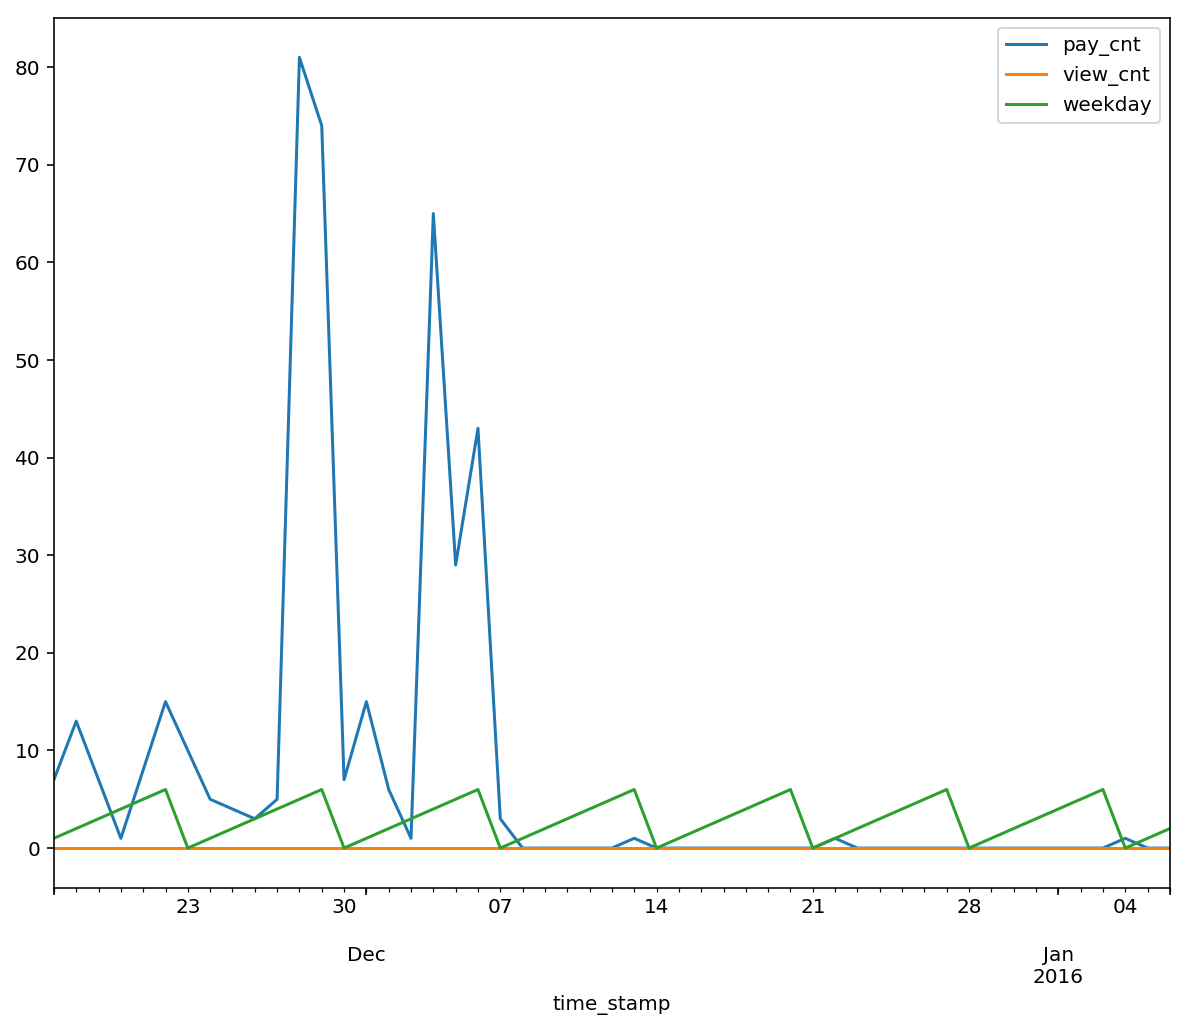

In [165]:
df_view_pay.loc[(5, slice(50, 100)), :].plot(x='time_stamp', y=['pay_cnt', 'view_cnt', 'weekday'], figsize=(10, 8))

# CHECKPOINT

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from collections import Counter
import numpy as np
import sys
import matplotlib.pyplot as plt

## Process Shop Info

In [21]:
shop_info = pd.read_csv('dataset/shop_info.txt', index_col=0, 
                        names=['city_name', 'location_id', 'per_pay', 'score', 'comment_cnt',
                               'shop_level', 'cate_1_name', 'cate_2_name', 'cate_3_name'])
shop_info

,city_name,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点
2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN
3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶
4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN
5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果
6,大连,1139,13,3.0,1.0,0,美食,烘焙糕点,面包
7,绍兴,145,13,3.0,9.0,2,美食,快餐,西式快餐
8,杭州,234,16,3.0,1.0,0,美食,休闲食品,生鲜水果
9,杭州,1120,15,4.0,0.0,1,超市便利店,超市,NaN
10,孝感,98,10,NaN,NaN,0,超市便利店,超市,NaN


In [22]:
city_name = shop_info['city_name']

city_cnt = Counter(city_name)
print(len(city_cnt))
city_cnt.most_common()[:10]

122


[('上海', 285),
 ('杭州', 225),
 ('北京', 163),
 ('广州', 136),
 ('南京', 130),
 ('武汉', 124),
 ('深圳', 88),
 ('温州', 67),
 ('苏州', 66),
 ('宁波', 45)]

In [23]:
city_list = sorted(city_cnt, key=city_cnt.get, reverse=True)
city_list


['上海',
 '杭州',
 '北京',
 '广州',
 '南京',
 '武汉',
 '深圳',
 '温州',
 '苏州',
 '宁波',
 '福州',
 '成都',
 '绍兴',
 '厦门',
 '无锡',
 '济南',
 '金华',
 '青岛',
 '合肥',
 '常州',
 '佛山',
 '南昌',
 '重庆',
 '天津',
 '西安',
 '南宁',
 '长沙',
 '大连',
 '郑州',
 '东莞',
 '沈阳',
 '南通',
 '嘉兴',
 '珠海',
 '泉州',
 '湖州',
 '惠州',
 '台州',
 '石家庄',
 '哈尔滨',
 '江门',
 '淮安',
 '漳州',
 '扬州',
 '徐州',
 '孝感',
 '襄阳',
 '宜昌',
 '太原',
 '贵阳',
 '中山',
 '南平',
 '株洲',
 '昆明',
 '黄石',
 '舟山',
 '衢州',
 '蚌埠',
 '镇江',
 '潍坊',
 '泰州',
 '黄冈',
 '宁德',
 '烟台',
 '盐城',
 '阜阳',
 '十堰',
 '黄山',
 '济宁',
 '咸宁',
 '莆田',
 '芜湖',
 '湛江',
 '玉林',
 '荆门',
 '汉中',
 '东营',
 '抚顺',
 '天门',
 '葫芦岛',
 '咸阳',
 '自贡',
 '石河子',
 '濮阳',
 '达州',
 '宿迁',
 '梧州',
 '长治',
 '通辽',
 '淮北',
 '邢台',
 '阳江',
 '锦州',
 '日照',
 '绵阳',
 '营口',
 '六安',
 '辽阳',
 '铜陵',
 '思茅',
 '清远',
 '宝鸡',
 '安康',
 '三明',
 '上饶',
 '信阳',
 '汕尾',
 '保定',
 '廊坊',
 '洛阳',
 '德阳',
 '龙岩',
 '威海',
 '张家口',
 '聊城',
 '肇庆',
 '丽水',
 '荆州',
 '乐山',
 '柳州',
 '邯郸',
 '三亚']

In [24]:
city2idx = {city: i for i, city in enumerate(city_list)}
city2idx

{'三亚': 121,
 '三明': 103,
 '上海': 0,
 '上饶': 104,
 '东莞': 29,
 '东营': 76,
 '中山': 50,
 '丽水': 116,
 '乐山': 118,
 '佛山': 20,
 '保定': 107,
 '信阳': 105,
 '六安': 96,
 '北京': 2,
 '十堰': 66,
 '南京': 4,
 '南宁': 25,
 '南平': 51,
 '南昌': 21,
 '南通': 31,
 '厦门': 13,
 '台州': 37,
 '合肥': 18,
 '咸宁': 69,
 '咸阳': 80,
 '哈尔滨': 39,
 '嘉兴': 32,
 '大连': 27,
 '天津': 23,
 '天门': 78,
 '太原': 48,
 '威海': 112,
 '孝感': 45,
 '宁德': 62,
 '宁波': 9,
 '安康': 102,
 '宜昌': 47,
 '宝鸡': 101,
 '宿迁': 85,
 '常州': 19,
 '广州': 3,
 '廊坊': 108,
 '张家口': 113,
 '徐州': 44,
 '德阳': 110,
 '思茅': 99,
 '惠州': 36,
 '成都': 11,
 '扬州': 43,
 '抚顺': 77,
 '无锡': 14,
 '日照': 93,
 '昆明': 53,
 '杭州': 1,
 '柳州': 119,
 '株洲': 52,
 '梧州': 86,
 '武汉': 5,
 '汉中': 75,
 '汕尾': 106,
 '江门': 40,
 '沈阳': 30,
 '泉州': 34,
 '泰州': 60,
 '洛阳': 109,
 '济南': 15,
 '济宁': 68,
 '淮北': 89,
 '淮安': 41,
 '深圳': 6,
 '清远': 100,
 '温州': 7,
 '湖州': 35,
 '湛江': 72,
 '漳州': 42,
 '潍坊': 59,
 '濮阳': 83,
 '烟台': 63,
 '玉林': 73,
 '珠海': 33,
 '盐城': 64,
 '石家庄': 38,
 '石河子': 82,
 '福州': 10,
 '绍兴': 12,
 '绵阳': 94,
 '聊城': 114,
 '肇庆': 115,
 '自贡': 81,
 '舟山': 

In [25]:
city_idx = [city2idx[city] for city in city_name]

In [26]:
shop_info.insert(loc=1, column='city_idx', value=city_idx)

In [27]:
shop_info

,city_name,city_idx,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
1,湖州,35,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点
2,哈尔滨,39,64,19,NaN,NaN,1,超市便利店,超市,NaN
3,南昌,21,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶
4,天津,23,380,18,NaN,NaN,1,超市便利店,超市,NaN
5,杭州,1,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果
6,大连,27,1139,13,3.0,1.0,0,美食,烘焙糕点,面包
7,绍兴,12,145,13,3.0,9.0,2,美食,快餐,西式快餐
8,杭州,1,234,16,3.0,1.0,0,美食,休闲食品,生鲜水果
9,杭州,1,1120,15,4.0,0.0,1,超市便利店,超市,NaN
10,孝感,45,98,10,NaN,NaN,0,超市便利店,超市,NaN


In [32]:
shop_info.sort_values('city_idx')

,city_name,city_idx,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
579,上海,0,1113,15,2.0,3.0,0,美食,快餐,其它快餐
1114,上海,0,943,1,4.0,1.0,0,美食,小吃,面点
1613,上海,0,341,3,NaN,NaN,1,超市便利店,便利店,NaN
1615,上海,0,900,1,4.0,0.0,1,超市便利店,便利店,NaN
1616,上海,0,833,18,NaN,NaN,1,超市便利店,超市,NaN
241,上海,0,924,11,3.0,2.0,2,美食,烘焙糕点,面包
240,上海,0,544,9,3.0,10.0,2,美食,快餐,西式快餐
1111,上海,0,697,5,3.0,0.0,1,超市便利店,便利店,NaN
536,上海,0,545,11,NaN,NaN,0,超市便利店,超市,NaN
1619,上海,0,501,6,3.0,4.0,0,美食,休闲茶饮,奶茶


In [33]:
shop_info.mean()

city_idx        12.311500
location_id    583.083000
per_pay         10.479000
score            2.677004
comment_cnt      3.130486
shop_level       0.814500
dtype: float64

In [34]:
shop_info = shop_info.fillna(shop_info.mean())
shop_info

,city_name,city_idx,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
1,湖州,35,885,8,4.000000,12.000000,2,美食,休闲茶饮,饮品/甜点
2,哈尔滨,39,64,19,2.677004,3.130486,1,超市便利店,超市,NaN
3,南昌,21,774,5,3.000000,2.000000,0,美食,休闲茶饮,奶茶
4,天津,23,380,18,2.677004,3.130486,1,超市便利店,超市,NaN
5,杭州,1,263,2,2.000000,2.000000,0,美食,休闲食品,生鲜水果
6,大连,27,1139,13,3.000000,1.000000,0,美食,烘焙糕点,面包
7,绍兴,12,145,13,3.000000,9.000000,2,美食,快餐,西式快餐
8,杭州,1,234,16,3.000000,1.000000,0,美食,休闲食品,生鲜水果
9,杭州,1,1120,15,4.000000,0.000000,1,超市便利店,超市,NaN
10,孝感,45,98,10,2.677004,3.130486,0,超市便利店,超市,NaN


In [35]:
cate_1 = shop_info['cate_1_name']
cate_1_cnt = Counter(cate_1)
cate_1_cnt

Counter({'休闲娱乐': 2,
         '医疗健康': 2,
         '美发/美容/美甲': 1,
         '美食': 1415,
         '购物': 1,
         '超市便利店': 579})

In [36]:
cate_1_list = sorted(cate_1_cnt, key=cate_1_cnt.get, reverse=True)
print(cate_1_list)

cate_1_toidx = {cate_1_name: i for i, cate_1_name in enumerate(cate_1_list)}
print(cate_1_toidx)

['美食', '超市便利店', '医疗健康', '休闲娱乐', '购物', '美发/美容/美甲']
{'购物': 4, '医疗健康': 2, '休闲娱乐': 3, '美发/美容/美甲': 5, '美食': 0, '超市便利店': 1}


In [37]:
cate_1_idx = [cate_1_toidx[cate_1_name] for cate_1_name in cate_1]
cate_1_idx

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 3,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,


In [38]:
shop_info.insert(loc=8, column='cate_1_idx', value=cate_1_idx)
shop_info

,city_name,city_idx,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_1_idx,cate_2_name,cate_3_name
1,湖州,35,885,8,4.000000,12.000000,2,美食,0,休闲茶饮,饮品/甜点
2,哈尔滨,39,64,19,2.677004,3.130486,1,超市便利店,1,超市,NaN
3,南昌,21,774,5,3.000000,2.000000,0,美食,0,休闲茶饮,奶茶
4,天津,23,380,18,2.677004,3.130486,1,超市便利店,1,超市,NaN
5,杭州,1,263,2,2.000000,2.000000,0,美食,0,休闲食品,生鲜水果
6,大连,27,1139,13,3.000000,1.000000,0,美食,0,烘焙糕点,面包
7,绍兴,12,145,13,3.000000,9.000000,2,美食,0,快餐,西式快餐
8,杭州,1,234,16,3.000000,1.000000,0,美食,0,休闲食品,生鲜水果
9,杭州,1,1120,15,4.000000,0.000000,1,超市便利店,1,超市,NaN
10,孝感,45,98,10,2.677004,3.130486,0,超市便利店,1,超市,NaN


In [39]:
cate_2 = shop_info['cate_2_name']
cate_2_cnt = Counter(cate_2)
cate_2_cnt

cate_2_list = sorted(cate_2_cnt, key=cate_2_cnt.get, reverse=True)
print(cate_2_list)

cate_2_toidx = {cate_2_name: i for i, cate_2_name in enumerate(cate_2_list)}
print(cate_2_toidx)

cate_2_idx = [cate_2_toidx[cate_2_name] for cate_2_name in cate_2]
cate_2_idx

shop_info.insert(loc=10, column='cate_2_idx', value=cate_2_idx)
shop_info

Counter({'个人护理': 1,
         '中餐': 78,
         '休闲茶饮': 177,
         '休闲食品': 150,
         '便利店': 206,
         '其他美食': 44,
         '小吃': 156,
         '快餐': 639,
         '本地购物': 1,
         '汤/粥/煲/砂锅/炖菜': 7,
         '火锅': 33,
         '烘焙糕点': 122,
         '烧烤': 9,
         '网吧网咖': 2,
         '美容美发': 1,
         '药店': 2,
         '超市': 372})

In [43]:
cate_3 = shop_info['cate_3_name']
cate_3_cnt = Counter(cate_3)
cate_3_cnt

Counter({nan: 585,
         '面点': 50,
         '海鲜': 3,
         '上海本帮菜': 1,
         '川味/重庆火锅': 13,
         '其它休闲食品': 16,
         '咖啡': 6,
         '其它地方菜': 20,
         '面包': 71,
         '冰激凌': 10,
         '奶茶': 92,
         '其它小吃': 87,
         '湘菜': 1,
         '麻辣烫/串串香': 9,
         '台湾菜': 2,
         '咖啡厅': 2,
         '西式快餐': 405,
         '生鲜水果': 111,
         '其它火锅': 11,
         '江浙菜': 13,
         '自助餐': 3,
         '蛋糕': 39,
         '东北菜': 3,
         '其它烘焙糕点': 12,
         '川菜': 13,
         '砂锅/煲类/炖菜': 4,
         '其他餐饮美食': 7,
         '熟食': 4,
         '米粉/米线': 15,
         '西餐': 19,
         '零食': 22,
         '西北菜': 6,
         '香锅/烤鱼': 1,
         '美食特产': 1,
         '粥': 3,
         '闽菜': 1,
         '粤菜': 12,
         '中式烧烤': 8,
         '日韩料理': 15,
         '其它快餐': 14,
         '中式快餐': 220,
         '其它烧烤': 1,
         '饮品/甜点': 67,
         '湖北菜': 2})

In [44]:
cate_3_list = sorted(cate_3_cnt, key=cate_3_cnt.get, reverse=True)
print(cate_3_list)

cate_3_toidx = {cate_3_name: i for i, cate_3_name in enumerate(cate_3_list)}
print(cate_3_toidx)

[nan, '西式快餐', '中式快餐', '生鲜水果', '奶茶', '其它小吃', '面包', '饮品/甜点', '面点', '蛋糕', '零食', '其它地方菜', '西餐', '其它休闲食品', '米粉/米线', '日韩料理', '其它快餐', '川味/重庆火锅', '江浙菜', '川菜', '其它烘焙糕点', '粤菜', '其它火锅', '冰激凌', '麻辣烫/串串香', '中式烧烤', '其他餐饮美食', '咖啡', '西北菜', '砂锅/煲类/炖菜', '熟食', '海鲜', '自助餐', '东北菜', '粥', '台湾菜', '咖啡厅', '湖北菜', '上海本帮菜', '湘菜', '闽菜', '香锅/烤鱼', '美食特产', '其它烧烤']
{nan: 0, '面点': 8, '西式快餐': 1, '上海本帮菜': 38, '川味/重庆火锅': 17, '熟食': 30, '咖啡': 27, '其它地方菜': 11, '生鲜水果': 3, '面包': 6, '冰激凌': 23, '米粉/米线': 14, '其它小吃': 5, '湘菜': 39, '麻辣烫/串串香': 24, '台湾菜': 35, '咖啡厅': 36, '海鲜': 31, '砂锅/煲类/炖菜': 29, '其它火锅': 22, '江浙菜': 18, '自助餐': 32, '蛋糕': 9, '东北菜': 33, '其它烘焙糕点': 20, '川菜': 19, '闽菜': 40, '其他餐饮美食': 26, '其它休闲食品': 13, '奶茶': 4, '西餐': 12, '零食': 10, '西北菜': 28, '香锅/烤鱼': 41, '美食特产': 42, '粥': 34, '粤菜': 21, '中式烧烤': 25, '日韩料理': 15, '其它快餐': 16, '中式快餐': 2, '其它烧烤': 43, '饮品/甜点': 7, '湖北菜': 37}


In [45]:
cate_3_idx = [cate_3_toidx[cate_3_name] for cate_3_name in cate_3]
cate_3_idx

[7,
 0,
 4,
 0,
 3,
 6,
 1,
 3,
 0,
 0,
 5,
 33,
 2,
 2,
 0,
 5,
 1,
 24,
 7,
 34,
 9,
 6,
 0,
 12,
 1,
 2,
 2,
 1,
 14,
 1,
 0,
 0,
 0,
 4,
 0,
 0,
 1,
 0,
 3,
 0,
 1,
 4,
 1,
 17,
 19,
 0,
 0,
 0,
 0,
 6,
 2,
 4,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 6,
 8,
 1,
 0,
 23,
 0,
 0,
 8,
 0,
 0,
 9,
 6,
 0,
 0,
 16,
 4,
 6,
 36,
 2,
 2,
 0,
 3,
 21,
 1,
 6,
 1,
 0,
 2,
 1,
 0,
 6,
 0,
 0,
 2,
 20,
 8,
 8,
 3,
 2,
 3,
 1,
 25,
 0,
 5,
 1,
 1,
 0,
 4,
 1,
 0,
 0,
 7,
 0,
 0,
 1,
 2,
 0,
 18,
 2,
 1,
 0,
 2,
 16,
 3,
 0,
 1,
 5,
 1,
 12,
 0,
 0,
 3,
 1,
 2,
 5,
 4,
 6,
 6,
 8,
 1,
 0,
 0,
 0,
 2,
 4,
 1,
 0,
 0,
 0,
 5,
 7,
 1,
 10,
 0,
 10,
 1,
 0,
 1,
 3,
 1,
 0,
 5,
 0,
 0,
 29,
 7,
 15,
 5,
 0,
 28,
 0,
 1,
 0,
 0,
 3,
 0,
 4,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 11,
 13,
 1,
 1,
 7,
 0,
 1,
 1,
 1,
 1,
 4,
 12,
 1,
 6,
 2,
 0,
 1,
 5,
 3,
 0,
 1,
 9,
 21,
 19,
 0,
 7,
 5,
 1,
 18,
 3,
 18,
 4,
 9,
 1,
 0,
 3,
 19,
 6,
 10,
 24,
 0,
 2,
 2,
 7,
 0,
 1,
 0,
 0,
 0,
 6,
 2,
 4,
 2,
 6,
 2,
 1,
 1,
 6,
 3,
 

In [46]:
shop_info.insert(loc=12, column='cate_3_idx', value=cate_3_idx)
shop_info

,city_name,city_idx,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_1_idx,cate_2_name,cate_2_idx,cate_3_name,cate_3_idx
1,湖州,35,885,8,4.000000,12.000000,2,美食,0,休闲茶饮,3,饮品/甜点,7
2,哈尔滨,39,64,19,2.677004,3.130486,1,超市便利店,1,超市,1,NaN,0
3,南昌,21,774,5,3.000000,2.000000,0,美食,0,休闲茶饮,3,奶茶,4
4,天津,23,380,18,2.677004,3.130486,1,超市便利店,1,超市,1,NaN,0
5,杭州,1,263,2,2.000000,2.000000,0,美食,0,休闲食品,5,生鲜水果,3
6,大连,27,1139,13,3.000000,1.000000,0,美食,0,烘焙糕点,6,面包,6
7,绍兴,12,145,13,3.000000,9.000000,2,美食,0,快餐,0,西式快餐,1
8,杭州,1,234,16,3.000000,1.000000,0,美食,0,休闲食品,5,生鲜水果,3
9,杭州,1,1120,15,4.000000,0.000000,1,超市便利店,1,超市,1,NaN,0
10,孝感,45,98,10,2.677004,3.130486,0,超市便利店,1,超市,1,NaN,0


In [47]:
drop_list = ['city_name', 'cate_1_name', 'cate_2_name', 'cate_3_name']
shop_info_feature = shop_info.drop(drop_list, axis=1)
shop_info_feature

,city_idx,location_id,per_pay,score,comment_cnt,shop_level,cate_1_idx,cate_2_idx,cate_3_idx
1,35,885,8,4.000000,12.000000,2,0,3,7
2,39,64,19,2.677004,3.130486,1,1,1,0
3,21,774,5,3.000000,2.000000,0,0,3,4
4,23,380,18,2.677004,3.130486,1,1,1,0
5,1,263,2,2.000000,2.000000,0,0,5,3
6,27,1139,13,3.000000,1.000000,0,0,6,6
7,12,145,13,3.000000,9.000000,2,0,0,1
8,1,234,16,3.000000,1.000000,0,0,5,3
9,1,1120,15,4.000000,0.000000,1,1,1,0
10,45,98,10,2.677004,3.130486,0,1,1,0


In [48]:
dummy_fields = ['shop_level', 'cate_1_idx', 'cate_2_idx', 'cate_3_idx']
for each in dummy_fields:
    dummies = pd.get_dummies(shop_info_feature[each], prefix=each, drop_first=False)
    shop_info_feature = pd.concat([shop_info_feature, dummies], axis=1)
drop_list = ['shop_level', 'cate_1_idx', 'cate_2_idx', 'cate_3_idx']
shop_info_feature = shop_info_feature.drop(drop_list, axis=1)
shop_info_feature

,city_idx,location_id,per_pay,score,comment_cnt,shop_level_0,shop_level_1,shop_level_2,cate_1_idx_0,cate_1_idx_1,...,cate_3_idx_34,cate_3_idx_35,cate_3_idx_36,cate_3_idx_37,cate_3_idx_38,cate_3_idx_39,cate_3_idx_40,cate_3_idx_41,cate_3_idx_42,cate_3_idx_43
1,35,885,8,4.000000,12.000000,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,39,64,19,2.677004,3.130486,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,21,774,5,3.000000,2.000000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,23,380,18,2.677004,3.130486,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,263,2,2.000000,2.000000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,27,1139,13,3.000000,1.000000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,12,145,13,3.000000,9.000000,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,234,16,3.000000,1.000000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1120,15,4.000000,0.000000,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,45,98,10,2.677004,3.130486,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
part_feature = shop_info_feature.loc[:, (slice('city_idx', 'comment_cnt'))]
part_feature

,city_idx,location_id,per_pay,score,comment_cnt
1,35,885,8,4.000000,12.000000
2,39,64,19,2.677004,3.130486
3,21,774,5,3.000000,2.000000
4,23,380,18,2.677004,3.130486
5,1,263,2,2.000000,2.000000
6,27,1139,13,3.000000,1.000000
7,12,145,13,3.000000,9.000000
8,1,234,16,3.000000,1.000000
9,1,1120,15,4.000000,0.000000
10,45,98,10,2.677004,3.130486


In [50]:
part_feature.mean()

city_idx        12.311500
location_id    583.083000
per_pay         10.479000
score            2.677004
comment_cnt      3.130486
dtype: float64

In [51]:
part_feature.std()

city_idx        19.033592
location_id    335.763357
per_pay          5.762479
score            0.946732
comment_cnt      3.234375
dtype: float64

In [52]:
norm_part_feature = (part_feature - part_feature.mean()) / part_feature.std()
norm_part_feature

,city_idx,location_id,per_pay,score,comment_cnt
1,1.192024,0.899196,-0.430197,1.397435e+00,2.742265e+00
2,1.402179,-1.545979,1.478704,-1.501043e-14,4.805603e-15
3,0.456482,0.568606,-0.950806,3.411693e-01,-3.495221e-01
4,0.561560,-0.604840,1.305167,-1.501043e-14,4.805603e-15
5,-0.594291,-0.953299,-1.471415,-7.150959e-01,-3.495221e-01
6,0.771715,1.655681,0.437485,3.411693e-01,-6.587009e-01
7,-0.016366,-1.304737,0.437485,3.411693e-01,1.814729e+00
8,-0.594291,-1.039670,0.958095,3.411693e-01,-6.587009e-01
9,-0.594291,1.599093,0.784558,1.397435e+00,-9.678796e-01
10,1.717411,-1.444717,-0.083124,-1.501043e-14,4.805603e-15


In [53]:
norm_part_feature.std()

city_idx       1.0
location_id    1.0
per_pay        1.0
score          1.0
comment_cnt    1.0
dtype: float64

In [54]:
norm_part_feature.mean()

city_idx      -4.074519e-17
location_id    1.112999e-16
per_pay        2.146616e-16
score         -1.490952e-14
comment_cnt    4.753226e-15
dtype: float64

In [55]:
shop_info_feature.loc[:, (slice('city_idx', 'comment_cnt'))] = norm_part_feature
shop_info_feature

,city_idx,location_id,per_pay,score,comment_cnt,shop_level_0,shop_level_1,shop_level_2,cate_1_idx_0,cate_1_idx_1,...,cate_3_idx_34,cate_3_idx_35,cate_3_idx_36,cate_3_idx_37,cate_3_idx_38,cate_3_idx_39,cate_3_idx_40,cate_3_idx_41,cate_3_idx_42,cate_3_idx_43
1,1.192024,0.899196,-0.430197,1.397435e+00,2.742265e+00,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.402179,-1.545979,1.478704,-1.501043e-14,4.805603e-15,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.456482,0.568606,-0.950806,3.411693e-01,-3.495221e-01,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.561560,-0.604840,1.305167,-1.501043e-14,4.805603e-15,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,-0.594291,-0.953299,-1.471415,-7.150959e-01,-3.495221e-01,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0.771715,1.655681,0.437485,3.411693e-01,-6.587009e-01,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,-0.016366,-1.304737,0.437485,3.411693e-01,1.814729e+00,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.594291,-1.039670,0.958095,3.411693e-01,-6.587009e-01,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,-0.594291,1.599093,0.784558,1.397435e+00,-9.678796e-01,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,1.717411,-1.444717,-0.083124,-1.501043e-14,4.805603e-15,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
shop_info_feature.to_csv('dataset/normed_shop_info_features.csv')

# EXTRA DATA

In [366]:
import pandas as pd

## Process aqi_data

In [395]:
df_aqi = pd.read_csv('dataset/aqi_data.csv', index_col=[0])
df_aqi

,三亚,三明,上海,上饶,东莞,东营,中山,丽水,乐山,佛山,...,阳江,青岛,黄冈,黄山,黄石,龙岩,舟山,湛江,天门,思茅
Date,,,,,,,,,,,,,,,,,,,,,
2015/7/1,38,64,57,43,50,86,34,47,45,44,...,41,86,75,25,65,42,44,49,53,38
2015/7/2,40,43,84,48,50,56,35,33,49,49,...,43,95,84,32,97,41,52,51,72,44
2015/7/3,46,31,105,76,49,48,36,37,34,53,...,43,77,61,55,78,43,50,56,67,39
2015/7/4,45,56,87,59,44,53,33,35,38,50,...,40,55,63,41,63,50,67,42,56,28
2015/7/5,48,23,52,45,44,80,33,32,40,51,...,41,57,60,21,72,39,60,33,62,33
2015/7/6,43,25,47,44,42,108,62,39,50,49,...,41,62,50,19,54,28,69,46,57,48
2015/7/7,43,20,57,45,42,125,56,41,60,46,...,42,53,50,24,45,23,58,44,52,70
2015/7/8,58,23,48,42,42,100,49,37,72,44,...,46,63,61,35,76,23,50,56,71,75
2015/7/9,58,33,40,40,34,78,43,42,51,49,...,47,57,48,30,43,18,35,59,74,70


In [396]:
city_name_2 = df_aqi.columns.values
set1 = set(city_name_2)

set2 = set(city2idx.keys())

set1 == set2

True

In [397]:
df_aqi.index

Index(['2015/7/1', '2015/7/2', '2015/7/3', '2015/7/4', '2015/7/5', '2015/7/6',
       '2015/7/7', '2015/7/8', '2015/7/9', '2015/7/10',
       ...
       '2016/11/21', '2016/11/22', '2016/11/23', '2016/11/24', '2016/11/25',
       '2016/11/26', '2016/11/27', '2016/11/28', '2016/11/29', '2016/11/30'],
      dtype='object', name='Date', length=519)

In [398]:
date_index = pd.date_range('2015-07-01', '2016-11-30', freq='D')
date_index.strftime('%Y-%m-%d')
date_index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
               '2016-11-29', '2016-11-30'],
              dtype='datetime64[ns]', length=519, freq='D')

In [399]:
df_aqi = df_aqi.reindex(date_index)
df_aqi

,三亚,三明,上海,上饶,东莞,东营,中山,丽水,乐山,佛山,...,阳江,青岛,黄冈,黄山,黄石,龙岩,舟山,湛江,天门,思茅
2015-07-01,38,64,57,43,50,86,34,47,45,44,...,41,86,75,25,65,42,44,49,53,38
2015-07-02,40,43,84,48,50,56,35,33,49,49,...,43,95,84,32,97,41,52,51,72,44
2015-07-03,46,31,105,76,49,48,36,37,34,53,...,43,77,61,55,78,43,50,56,67,39
2015-07-04,45,56,87,59,44,53,33,35,38,50,...,40,55,63,41,63,50,67,42,56,28
2015-07-05,48,23,52,45,44,80,33,32,40,51,...,41,57,60,21,72,39,60,33,62,33
2015-07-06,43,25,47,44,42,108,62,39,50,49,...,41,62,50,19,54,28,69,46,57,48
2015-07-07,43,20,57,45,42,125,56,41,60,46,...,42,53,50,24,45,23,58,44,52,70
2015-07-08,58,23,48,42,42,100,49,37,72,44,...,46,63,61,35,76,23,50,56,71,75
2015-07-09,58,33,40,40,34,78,43,42,51,49,...,47,57,48,30,43,18,35,59,74,70
2015-07-10,48,41,35,37,31,112,27,34,46,38,...,35,49,37,40,44,29,30,59,56,70


In [400]:
df_aqi.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
               '2016-11-29', '2016-11-30'],
              dtype='datetime64[ns]', length=519, freq='D')

In [401]:
df_aqi = df_aqi.rename(columns=city2idx)
df_aqi

,121,103,0,104,29,76,50,116,118,20,...,91,17,61,67,54,111,55,72,78,99
2015-07-01,38,64,57,43,50,86,34,47,45,44,...,41,86,75,25,65,42,44,49,53,38
2015-07-02,40,43,84,48,50,56,35,33,49,49,...,43,95,84,32,97,41,52,51,72,44
2015-07-03,46,31,105,76,49,48,36,37,34,53,...,43,77,61,55,78,43,50,56,67,39
2015-07-04,45,56,87,59,44,53,33,35,38,50,...,40,55,63,41,63,50,67,42,56,28
2015-07-05,48,23,52,45,44,80,33,32,40,51,...,41,57,60,21,72,39,60,33,62,33
2015-07-06,43,25,47,44,42,108,62,39,50,49,...,41,62,50,19,54,28,69,46,57,48
2015-07-07,43,20,57,45,42,125,56,41,60,46,...,42,53,50,24,45,23,58,44,52,70
2015-07-08,58,23,48,42,42,100,49,37,72,44,...,46,63,61,35,76,23,50,56,71,75
2015-07-09,58,33,40,40,34,78,43,42,51,49,...,47,57,48,30,43,18,35,59,74,70
2015-07-10,48,41,35,37,31,112,27,34,46,38,...,35,49,37,40,44,29,30,59,56,70


## Add more data to sequences data

In [409]:
df_view_pay = pd.read_csv('dataset/user_view_pay_df_1.csv', index_col=[0, 1])
df_view_pay

time_stamp  view_cnt  pay_cnt  weekday  month
shop_id idx                                               
1       0    2015-10-10         0      188        5     10
        1    2015-10-11         0      272        6     10
        2    2015-10-12         0      257        0     10
        3    2015-10-13         0      239        1     10
        4    2015-10-14         0      277        2     10
        5    2015-10-15         0      227        3     10
        6    2015-10-16         0      242        4     10
        7    2015-10-17         0      293        5     10
        8    2015-10-18         0      291        6     10
        9    2015-10-19         0      256        0     10
        10   2015-10-20         0      262        1     10
        11   2015-10-21         0      271        2     10
        12   2015-10-22         0      260        3     10
        13   2015-10-23         0      240        4     10
        14   2015-10-24         0      291        5     10
        15   2015-10-25         0      286        6     10
        16   2015-10-26         0      264        0     10
        17   2015-10-27         0      295        1     10
        18   2015-10-28         0      310        2     10
        19   2015-10-29         0      212        3     10
        20   2015-10-30         0      331        4     10
        21   2015-10-31         0      347        5     10
        22   2015-11-01         0      381        6     11
        23   2015-11-02         0      332        0     11
        24   2015-11-03         0      404        1     11
        25   2015-11-04         0      392        2     11
        26   2015-11-05         0      496        3     11
        27   2015-11-06         0      430        4     11
        28   2015-11-07         0      351        5     11
        29   2015-11-08         0      288        6     11
...                 ...       ...      ...      ...    ...
2000    150  2016-10-02         4       39        6     10
        151  2016-10-03         3       50        0     10
        152  2016-10-04         8       29        1     10
        153  2016-10-05         3       35        2     10
        154  2016-10-06         4       76        3     10
        155  2016-10-07        11       68        4     10
        156  2016-10-08        16      158        5     10
        157  2016-10-09        24      176        6     10
        158  2016-10-10        35      161        0     10
        159  2016-10-11        24      163        1     10
        160  2016-10-12        33      159        2     10
        161  2016-10-13        35      177        3     10
        162  2016-10-14        14      148        4     10
        163  2016-10-15         9       78        5     10
        164  2016-10-16         4       60        6     10
        165  2016-10-17        16      163        0     10
        166  2016-10-18        18      157        1     10
        167  2016-10-19        14      164        2     10
        168  2016-10-20        35      165        3     10
        169  2016-10-21        13      138        4     10
        170  2016-10-22         6       66        5     10
        171  2016-10-23         4       59        6     10
        172  2016-10-24        19      162        0     10
        173  2016-10-25        14      181        1     10
        174  2016-10-26        13      184        2     10
        175  2016-10-27        16      132        3     10
        176  2016-10-28        12      133        4     10
        177  2016-10-29        11       67        5     10
        178  2016-10-30         3       67        6     10
        179  2016-10-31        15      168        0     10

[643289 rows x 5 columns]

In [410]:
first_ts = df_view_pay.loc[(slice(None), 0), 'time_stamp']
first_ts[first_ts < '2015-07-01' ]

Series([], Name: time_stamp, dtype: object)

In [411]:
shop_info

,city_name,city_idx,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_1_idx,cate_2_name,cate_2_idx,cate_3_name,cate_3_idx
1,湖州,35,885,8,4.000000,12.000000,2,美食,0,休闲茶饮,3,饮品/甜点,7
2,哈尔滨,39,64,19,2.677004,3.130486,1,超市便利店,1,超市,1,NaN,0
3,南昌,21,774,5,3.000000,2.000000,0,美食,0,休闲茶饮,3,奶茶,4
4,天津,23,380,18,2.677004,3.130486,1,超市便利店,1,超市,1,NaN,0
5,杭州,1,263,2,2.000000,2.000000,0,美食,0,休闲食品,5,生鲜水果,3
6,大连,27,1139,13,3.000000,1.000000,0,美食,0,烘焙糕点,6,面包,6
7,绍兴,12,145,13,3.000000,9.000000,2,美食,0,快餐,0,西式快餐,1
8,杭州,1,234,16,3.000000,1.000000,0,美食,0,休闲食品,5,生鲜水果,3
9,杭州,1,1120,15,4.000000,0.000000,1,超市便利店,1,超市,1,NaN,0
10,孝感,45,98,10,2.677004,3.130486,0,超市便利店,1,超市,1,NaN,0


In [412]:
shop_info.loc[1, 'city_idx']

35

In [413]:
df_aqi.loc[slice('2015/7/1','2015/7/10'), shop_info.loc[1, 'city_idx']]

2015-07-01    59
2015-07-02    84
2015-07-03    99
2015-07-04    67
2015-07-05    52
2015-07-06    47
2015-07-07    52
2015-07-08    58
2015-07-09    60
2015-07-10    45
Freq: D, Name: 35, dtype: int64

In [414]:
shop_1 = df_view_pay.loc[7]
shop_1 = shop_1.set_index('time_stamp')
shop_1

,view_cnt,pay_cnt,weekday,month
time_stamp,,,,
2015-07-01,0,0,2,7
2015-07-02,0,1,3,7
2015-07-03,0,1,4,7
2015-07-04,0,0,5,7
2015-07-05,0,0,6,7
2015-07-06,0,0,0,7
2015-07-07,0,0,1,7
2015-07-08,0,0,2,7
2015-07-09,0,2,3,7


In [415]:
shop_1.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26',
       '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30', '2016-10-31'],
      dtype='object', name='time_stamp', length=489)

In [416]:
pd.date_range('2015-06-28', '2016-10-31')

DatetimeIndex(['2015-06-28', '2015-06-29', '2015-06-30', '2015-07-01',
               '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
               '2015-07-06', '2015-07-07',
               ...
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', length=492, freq='D')

In [417]:
shop_1.shape

(489, 4)

In [418]:
shop_1.index[0]

'2015-07-01'

In [419]:
df_aqi.loc[slice(shop_1.index[0],shop_1.index[-1]), shop_info.loc[1, 'city_idx']].shape

(489,)

In [420]:
shop_1['aqi'] = df_aqi.loc[slice(shop_1.index[0],shop_1.index[-1]), shop_info.loc[1, 'city_idx']].values
shop_1

,view_cnt,pay_cnt,weekday,month,aqi
time_stamp,,,,,
2015-07-01,0,0,2,7,59
2015-07-02,0,1,3,7,84
2015-07-03,0,1,4,7,99
2015-07-04,0,0,5,7,67
2015-07-05,0,0,6,7,52
2015-07-06,0,0,0,7,47
2015-07-07,0,0,1,7,52
2015-07-08,0,0,2,7,58
2015-07-09,0,2,3,7,60


In [421]:
df_view_pay.loc[slice(1, 20)]

time_stamp  view_cnt  pay_cnt  weekday  month
shop_id idx                                               
1       0    2015-10-10         0      188        5     10
        1    2015-10-11         0      272        6     10
        2    2015-10-12         0      257        0     10
        3    2015-10-13         0      239        1     10
        4    2015-10-14         0      277        2     10
        5    2015-10-15         0      227        3     10
        6    2015-10-16         0      242        4     10
        7    2015-10-17         0      293        5     10
        8    2015-10-18         0      291        6     10
        9    2015-10-19         0      256        0     10
        10   2015-10-20         0      262        1     10
        11   2015-10-21         0      271        2     10
        12   2015-10-22         0      260        3     10
        13   2015-10-23         0      240        4     10
        14   2015-10-24         0      291        5     10
        15   2015-10-25         0      286        6     10
        16   2015-10-26         0      264        0     10
        17   2015-10-27         0      295        1     10
        18   2015-10-28         0      310        2     10
        19   2015-10-29         0      212        3     10
        20   2015-10-30         0      331        4     10
        21   2015-10-31         0      347        5     10
        22   2015-11-01         0      381        6     11
        23   2015-11-02         0      332        0     11
        24   2015-11-03         0      404        1     11
        25   2015-11-04         0      392        2     11
        26   2015-11-05         0      496        3     11
        27   2015-11-06         0      430        4     11
        28   2015-11-07         0      351        5     11
        29   2015-11-08         0      288        6     11
...                 ...       ...      ...      ...    ...
20      184  2016-10-02        12       73        6     10
        185  2016-10-03         9       98        0     10
        186  2016-10-04         7      101        1     10
        187  2016-10-05        12       89        2     10
        188  2016-10-06        15      103        3     10
        189  2016-10-07        10      100        4     10
        190  2016-10-08        15      157        5     10
        191  2016-10-09        12      157        6     10
        192  2016-10-10        19      160        0     10
        193  2016-10-11        17      167        1     10
        194  2016-10-12        16      165        2     10
        195  2016-10-13        17      137        3     10
        196  2016-10-14         8      154        4     10
        197  2016-10-15         7      149        5     10
        198  2016-10-16         3      140        6     10
        199  2016-10-17         9      155        0     10
        200  2016-10-18        10      162        1     10
        201  2016-10-19        11      149        2     10
        202  2016-10-20         2      172        3     10
        203  2016-10-21        10      150        4     10
        204  2016-10-22         5      128        5     10
        205  2016-10-23         4      119        6     10
        206  2016-10-24         2      159        0     10
        207  2016-10-25         7      164        1     10
        208  2016-10-26         4      134        2     10
        209  2016-10-27         8      151        3     10
        210  2016-10-28         7      137        4     10
        211  2016-10-29         9      139        5     10
        212  2016-10-30         7      136        6     10
        213  2016-10-31         2      173        0     10

[5872 rows x 5 columns]

In [422]:
ID_list = range(1, 21)
shop_list = []
for ID in ID_list:
    shop = df_view_pay.loc[ID].copy()
    shop = shop.set_index('time_stamp')
    print(ID)
    shop['aqi'] = df_aqi.loc[slice(shop.index[0],shop.index[-1]), shop_info.loc[ID, 'city_idx']].values
    shop_list.append(shop)

df_view_pay_with_aqi = pd.concat(shop_list, keys=ID_list, names=['shop_id'])
df_view_pay_with_aqi
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


view_cnt  pay_cnt  weekday  month  aqi
shop_id time_stamp                                        
1       2015-10-10         0      188        5     10   64
        2015-10-11         0      272        6     10   68
        2015-10-12         0      257        0     10   85
        2015-10-13         0      239        1     10   84
        2015-10-14         0      277        2     10  143
        2015-10-15         0      227        3     10  164
        2015-10-16         0      242        4     10  135
        2015-10-17         0      293        5     10   78
        2015-10-18         0      291        6     10   66
        2015-10-19         0      256        0     10   67
        2015-10-20         0      262        1     10   76
        2015-10-21         0      271        2     10   69
        2015-10-22         0      260        3     10   85
        2015-10-23         0      240        4     10  102
        2015-10-24         0      291        5     10   77
        2015-10-25         0      286        6     10   71
        2015-10-26         0      264        0     10   83
        2015-10-27         0      295        1     10   66
        2015-10-28         0      310        2     10   86
        2015-10-29         0      212        3     10   76
        2015-10-30         0      331        4     10   51
        2015-10-31         0      347        5     10   40
        2015-11-01         0      381        6     11   66
        2015-11-02         0      332        0     11   80
        2015-11-03         0      404        1     11  111
        2015-11-04         0      392        2     11  112
        2015-11-05         0      496        3     11   89
        2015-11-06         0      430        4     11   63
        2015-11-07         0      351        5     11   46
        2015-11-08         0      288        6     11   42
...                      ...      ...      ...    ...  ...
20      2016-10-02        12       73        6     10   40
        2016-10-03         9       98        0     10   36
        2016-10-04         7      101        1     10   46
        2016-10-05        12       89        2     10   53
        2016-10-06        15      103        3     10   54
        2016-10-07        10      100        4     10   50
        2016-10-08        15      157        5     10   34
        2016-10-09        12      157        6     10   44
        2016-10-10        19      160        0     10   49
        2016-10-11        17      167        1     10   51
        2016-10-12        16      165        2     10   48
        2016-10-13        17      137        3     10   37
        2016-10-14         8      154        4     10   38
        2016-10-15         7      149        5     10   51
        2016-10-16         3      140        6     10   50
        2016-10-17         9      155        0     10   59
        2016-10-18        10      162        1     10   36
        2016-10-19        11      149        2     10   20
        2016-10-20         2      172        3     10   39
        2016-10-21        10      150        4     10   39
        2016-10-22         5      128        5     10   62
        2016-10-23         4      119        6     10   62
        2016-10-24         2      159        0     10   48
        2016-10-25         7      164        1     10   41
        2016-10-26         4      134        2     10   56
        2016-10-27         8      151        3     10   57
        2016-10-28         7      137        4     10   68
        2016-10-29         9      139        5     10   56
        2016-10-30         7      136        6     10   37
        2016-10-31         2      173        0     10   44

[5872 rows x 5 columns]

In [423]:
df_view_pay_with_aqi.loc[7]

,view_cnt,pay_cnt,weekday,month,aqi
time_stamp,,,,,
2015-07-01,0,0,2,7,39
2015-07-02,0,1,3,7,88
2015-07-03,0,1,4,7,74
2015-07-04,0,0,5,7,71
2015-07-05,0,0,6,7,46
2015-07-06,0,0,0,7,55
2015-07-07,0,0,1,7,51
2015-07-08,0,0,2,7,72
2015-07-09,0,2,3,7,53


In [424]:
df_weather = pd.read_csv('dataset/weather_data.csv', index_col=[0, 1], names=['tmp_h', 'tmp_l', 'weather', 'wind_d', 'wind'])
df_weather

tmp_h  tmp_l  weather wind_d  wind
三亚 2015-07-01     33     28       多云    西南风  3-4级
   2015-07-02     34     28       多云    西南风  3-4级
   2015-07-03     34     28       多云    西南风  3-4级
   2015-07-04     35     28       多云    西南风  3-4级
   2015-07-05     33     27    雷雨~多云    西北风  3-4级
   2015-07-06     33     28    雷雨~多云    西北风  3-4级
   2015-07-07     34     28       多云    东北风  3-4级
   2015-07-08     32     27       多云    东北风  3-4级
   2015-07-09     32     27       多云    东北风  3-4级
   2015-07-10     33     26       多云    东北风  3-4级
   2015-07-11     32     26       多云    东南风  3-4级
   2015-07-12     32     27       多云    东北风  3-4级
   2015-07-13     32     27    阵雨~多云    东南风  3-4级
   2015-07-14     32     27       多云    西南风  3-4级
   2015-07-15     33     28       多云    东南风  3-4级
   2015-07-16     33     28       多云    西南风  3-4级
   2015-07-17     32     27    多云~阵雨    西南风  3-4级
   2015-07-18     31     26     大到暴雨    西南风  3-4级
   2015-07-19     29     26     大到暴雨    西南风  3-4级
   2015-07-20     29     26  大到暴雨~阵雨    西南风  3-4级
   2015-07-21     31     27       多云     南风  3-4级
   2015-07-22     32     27       多云    东南风  3-4级
   2015-07-23     32     27       多云    东南风  3-4级
   2015-07-24     33     28       多云    西南风  3-4级
   2015-07-25     31     27   多云~雷阵雨    西南风  3-4级
   2015-07-26     30     26       阵雨    西南风  3-4级
   2015-07-27     29     24       阵雨    东南风  3-4级
   2015-07-28     26     24     大到暴雨    西南风  3-4级
   2015-07-29     28     25     大到暴雨    西南风  3-4级
   2015-07-30     27     24    中雨~阵雨    西南风  3-4级
...              ...    ...      ...    ...   ...
龙岩 2016-11-01     23     15        阴    东北风    1级
   2016-11-02     22     13       多云    东北风    3级
   2016-11-03     22     13        晴     北风    2级
   2016-11-04     24     14        晴     微风    2级
   2016-11-05     26     16       多云     北风    微风
   2016-11-06     27     17        晴    西南风    1级
   2016-11-07     27     16       多云    东南风    1级
   2016-11-08     24     15       阵雨    西北风    1级
   2016-11-09     18     13       阵雨    西北风    2级
   2016-11-10     18      7       多云    东北风    2级
   2016-11-11     21     12       多云     东风    1级
   2016-11-12     23     17       阵雨     北风    微风
   2016-11-13     28     18       多云     微风    1级
   2016-11-14     29     19       多云     东风    1级
   2016-11-15     28     18       多云    东南风    1级
   2016-11-16     30     19        晴     南风    1级
   2016-11-17     29     18        晴     东风    2级
   2016-11-18     28     18       多云     东风    1级
   2016-11-19     27     20       阵雨     南风    1级
   2016-11-20     24     20       大雨    东北风    1级
   2016-11-21     23     19       中雨    西北风    1级
   2016-11-22     23     16       小雨     南风    1级
   2016-11-23     18     10       阵雨    东北风    2级
   2016-11-24     16     10        阴    东北风    1级
   2016-11-25     16     12       中雨    东北风    1级
   2016-11-26     15     10       大雨    东北风    2级
   2016-11-27     19      7       多云     北风    2级
   2016-11-28     20      9        晴     东风    2级
   2016-11-29     20     10        晴    西南风    1级
   2016-11-30     21      9        晴     北风    2级

[63318 rows x 5 columns]

In [425]:
df_weather['tmp'] = (df_weather['tmp_h'] + df_weather['tmp_l'])/2.0

In [426]:
df_weather.index.levels[0]

Index(['三亚', '三明', '上海', '上饶', '东莞', '东营', '中山', '丽水', '乐山', '佛山',
       ...
       '镇江', '长沙', '长治', '阜阳', '阳江', '青岛', '黄冈', '黄山', '黄石', '龙岩'],
      dtype='object', length=122)

In [427]:
df_weather = df_weather.rename(index=city2idx)
df_weather

tmp_h  tmp_l  weather wind_d  wind   tmp
121 2015-07-01     33     28       多云    西南风  3-4级  30.5
    2015-07-02     34     28       多云    西南风  3-4级  31.0
    2015-07-03     34     28       多云    西南风  3-4级  31.0
    2015-07-04     35     28       多云    西南风  3-4级  31.5
    2015-07-05     33     27    雷雨~多云    西北风  3-4级  30.0
    2015-07-06     33     28    雷雨~多云    西北风  3-4级  30.5
    2015-07-07     34     28       多云    东北风  3-4级  31.0
    2015-07-08     32     27       多云    东北风  3-4级  29.5
    2015-07-09     32     27       多云    东北风  3-4级  29.5
    2015-07-10     33     26       多云    东北风  3-4级  29.5
    2015-07-11     32     26       多云    东南风  3-4级  29.0
    2015-07-12     32     27       多云    东北风  3-4级  29.5
    2015-07-13     32     27    阵雨~多云    东南风  3-4级  29.5
    2015-07-14     32     27       多云    西南风  3-4级  29.5
    2015-07-15     33     28       多云    东南风  3-4级  30.5
    2015-07-16     33     28       多云    西南风  3-4级  30.5
    2015-07-17     32     27    多云~阵雨    西南风  3-4级  29.5
    2015-07-18     31     26     大到暴雨    西南风  3-4级  28.5
    2015-07-19     29     26     大到暴雨    西南风  3-4级  27.5
    2015-07-20     29     26  大到暴雨~阵雨    西南风  3-4级  27.5
    2015-07-21     31     27       多云     南风  3-4级  29.0
    2015-07-22     32     27       多云    东南风  3-4级  29.5
    2015-07-23     32     27       多云    东南风  3-4级  29.5
    2015-07-24     33     28       多云    西南风  3-4级  30.5
    2015-07-25     31     27   多云~雷阵雨    西南风  3-4级  29.0
    2015-07-26     30     26       阵雨    西南风  3-4级  28.0
    2015-07-27     29     24       阵雨    东南风  3-4级  26.5
    2015-07-28     26     24     大到暴雨    西南风  3-4级  25.0
    2015-07-29     28     25     大到暴雨    西南风  3-4级  26.5
    2015-07-30     27     24    中雨~阵雨    西南风  3-4级  25.5
...               ...    ...      ...    ...   ...   ...
111 2016-11-01     23     15        阴    东北风    1级  19.0
    2016-11-02     22     13       多云    东北风    3级  17.5
    2016-11-03     22     13        晴     北风    2级  17.5
    2016-11-04     24     14        晴     微风    2级  19.0
    2016-11-05     26     16       多云     北风    微风  21.0
    2016-11-06     27     17        晴    西南风    1级  22.0
    2016-11-07     27     16       多云    东南风    1级  21.5
    2016-11-08     24     15       阵雨    西北风    1级  19.5
    2016-11-09     18     13       阵雨    西北风    2级  15.5
    2016-11-10     18      7       多云    东北风    2级  12.5
    2016-11-11     21     12       多云     东风    1级  16.5
    2016-11-12     23     17       阵雨     北风    微风  20.0
    2016-11-13     28     18       多云     微风    1级  23.0
    2016-11-14     29     19       多云     东风    1级  24.0
    2016-11-15     28     18       多云    东南风    1级  23.0
    2016-11-16     30     19        晴     南风    1级  24.5
    2016-11-17     29     18        晴     东风    2级  23.5
    2016-11-18     28     18       多云     东风    1级  23.0
    2016-11-19     27     20       阵雨     南风    1级  23.5
    2016-11-20     24     20       大雨    东北风    1级  22.0
    2016-11-21     23     19       中雨    西北风    1级  21.0
    2016-11-22     23     16       小雨     南风    1级  19.5
    2016-11-23     18     10       阵雨    东北风    2级  14.0
    2016-11-24     16     10        阴    东北风    1级  13.0
    2016-11-25     16     12       中雨    东北风    1级  14.0
    2016-11-26     15     10       大雨    东北风    2级  12.5
    2016-11-27     19      7       多云     北风    2级  13.0
    2016-11-28     20      9        晴     东风    2级  14.5
    2016-11-29     20     10        晴    西南风    1级  15.0
    2016-11-30     21      9        晴     北风    2级  15.0

[63318 rows x 6 columns]

In [428]:
def cate_to_idx(cate_column):
    cate_cnt = Counter(cate_column)
    cate_list = sorted(cate_cnt, key=cate_cnt.get, reverse=True)
#     print(cate_list)

    cate_toidx = {cate_name: i for i, cate_name in enumerate(cate_list)}
#     print(cate_toidx)

    cate_idx = [cate_toidx[cate_name] for cate_name in cate_column]

    return cate_idx
    

In [429]:
weather_idx = cate_to_idx(df_weather['weather'])
weather_idx
df_weather.insert(loc=3, column='weather_idx', value=weather_idx)
df_weather

tmp_h  tmp_l  weather  weather_idx wind_d  wind   tmp
121 2015-07-01     33     28       多云            0    西南风  3-4级  30.5
    2015-07-02     34     28       多云            0    西南风  3-4级  31.0
    2015-07-03     34     28       多云            0    西南风  3-4级  31.0
    2015-07-04     35     28       多云            0    西南风  3-4级  31.5
    2015-07-05     33     27    雷雨~多云           82    西北风  3-4级  30.0
    2015-07-06     33     28    雷雨~多云           82    西北风  3-4级  30.5
    2015-07-07     34     28       多云            0    东北风  3-4级  31.0
    2015-07-08     32     27       多云            0    东北风  3-4级  29.5
    2015-07-09     32     27       多云            0    东北风  3-4级  29.5
    2015-07-10     33     26       多云            0    东北风  3-4级  29.5
    2015-07-11     32     26       多云            0    东南风  3-4级  29.0
    2015-07-12     32     27       多云            0    东北风  3-4级  29.5
    2015-07-13     32     27    阵雨~多云           13    东南风  3-4级  29.5
    2015-07-14     32     27       多云            0    西南风  3-4级  29.5
    2015-07-15     33     28       多云            0    东南风  3-4级  30.5
    2015-07-16     33     28       多云            0    西南风  3-4级  30.5
    2015-07-17     32     27    多云~阵雨           16    西南风  3-4级  29.5
    2015-07-18     31     26     大到暴雨           53    西南风  3-4级  28.5
    2015-07-19     29     26     大到暴雨           53    西南风  3-4级  27.5
    2015-07-20     29     26  大到暴雨~阵雨          143    西南风  3-4级  27.5
    2015-07-21     31     27       多云            0     南风  3-4级  29.0
    2015-07-22     32     27       多云            0    东南风  3-4级  29.5
    2015-07-23     32     27       多云            0    东南风  3-4级  29.5
    2015-07-24     33     28       多云            0    西南风  3-4级  30.5
    2015-07-25     31     27   多云~雷阵雨           25    西南风  3-4级  29.0
    2015-07-26     30     26       阵雨            4    西南风  3-4级  28.0
    2015-07-27     29     24       阵雨            4    东南风  3-4级  26.5
    2015-07-28     26     24     大到暴雨           53    西南风  3-4级  25.0
    2015-07-29     28     25     大到暴雨           53    西南风  3-4级  26.5
    2015-07-30     27     24    中雨~阵雨           24    西南风  3-4级  25.5
...               ...    ...      ...          ...    ...   ...   ...
111 2016-11-01     23     15        阴            3    东北风    1级  19.0
    2016-11-02     22     13       多云            0    东北风    3级  17.5
    2016-11-03     22     13        晴            1     北风    2级  17.5
    2016-11-04     24     14        晴            1     微风    2级  19.0
    2016-11-05     26     16       多云            0     北风    微风  21.0
    2016-11-06     27     17        晴            1    西南风    1级  22.0
    2016-11-07     27     16       多云            0    东南风    1级  21.5
    2016-11-08     24     15       阵雨            4    西北风    1级  19.5
    2016-11-09     18     13       阵雨            4    西北风    2级  15.5
    2016-11-10     18      7       多云            0    东北风    2级  12.5
    2016-11-11     21     12       多云            0     东风    1级  16.5
    2016-11-12     23     17       阵雨            4     北风    微风  20.0
    2016-11-13     28     18       多云            0     微风    1级  23.0
    2016-11-14     29     19       多云            0     东风    1级  24.0
    2016-11-15     28     18       多云            0    东南风    1级  23.0
    2016-11-16     30     19        晴            1     南风    1级  24.5
    2016-11-17     29     18        晴            1     东风    2级  23.5
    2016-11-18     28     18       多云            0     东风    1级  23.0
    2016-11-19     27     20       阵雨            4     南风    1级  23.5
    2016-11-20     24     20       大雨           21    东北风    1级  22.0
    2016-11-21     23     19       中雨           10    西北风    1级  21.0
    2016-11-22     23     16       小雨            2     南风    1级  19.5
    2016-11-23     18     10       阵雨            4    东北风    2级  14.0
    2016-11-24     16     10        阴            3    东北风    1级  13.0
    2016-11-25     16     12       中雨           10    东北风    1级  14.0
    2016-11-26     15     

In [430]:
wind_idx = cate_to_idx(df_weather['wind'])
df_weather.insert(loc=5, column='wind_idx', value=wind_idx)
df_weather

tmp_h  tmp_l  weather  weather_idx wind_d  wind_idx  wind  \
121 2015-07-01     33     28       多云            0    西南风         3  3-4级   
    2015-07-02     34     28       多云            0    西南风         3  3-4级   
    2015-07-03     34     28       多云            0    西南风         3  3-4级   
    2015-07-04     35     28       多云            0    西南风         3  3-4级   
    2015-07-05     33     27    雷雨~多云           82    西北风         3  3-4级   
    2015-07-06     33     28    雷雨~多云           82    西北风         3  3-4级   
    2015-07-07     34     28       多云            0    东北风         3  3-4级   
    2015-07-08     32     27       多云            0    东北风         3  3-4级   
    2015-07-09     32     27       多云            0    东北风         3  3-4级   
    2015-07-10     33     26       多云            0    东北风         3  3-4级   
    2015-07-11     32     26       多云            0    东南风         3  3-4级   
    2015-07-12     32     27       多云            0    东北风         3  3-4级   
    2015-07-13     32     27    阵雨~多云           13    东南风         3  3-4级   
    2015-07-14     32     27       多云            0    西南风         3  3-4级   
    2015-07-15     33     28       多云            0    东南风         3  3-4级   
    2015-07-16     33     28       多云            0    西南风         3  3-4级   
    2015-07-17     32     27    多云~阵雨           16    西南风         3  3-4级   
    2015-07-18     31     26     大到暴雨           53    西南风         3  3-4级   
    2015-07-19     29     26     大到暴雨           53    西南风         3  3-4级   
    2015-07-20     29     26  大到暴雨~阵雨          143    西南风         3  3-4级   
    2015-07-21     31     27       多云            0     南风         3  3-4级   
    2015-07-22     32     27       多云            0    东南风         3  3-4级   
    2015-07-23     32     27       多云            0    东南风         3  3-4级   
    2015-07-24     33     28       多云            0    西南风         3  3-4级   
    2015-07-25     31     27   多云~雷阵雨           25    西南风         3  3-4级   
    2015-07-26     30     26       阵雨            4    西南风         3  3-4级   
    2015-07-27     29     24       阵雨            4    东南风         3  3-4级   
    2015-07-28     26     24     大到暴雨           53    西南风         3  3-4级   
    2015-07-29     28     25     大到暴雨           53    西南风         3  3-4级   
    2015-07-30     27     24    中雨~阵雨           24    西南风         3  3-4级   
...               ...    ...      ...          ...    ...       ...   ...   
111 2016-11-01     23     15        阴            3    东北风         1    1级   
    2016-11-02     22     13       多云            0    东北风         5    3级   
    2016-11-03     22     13        晴            1     北风         2    2级   
    2016-11-04     24     14        晴            1     微风         2    2级   
    2016-11-05     26     16       多云            0     北风        10    微风   
    2016-11-06     27     17        晴            1    西南风         1    1级   
    2016-11-07     27     16       多云            0    东南风         1    1级   
    2016-11-08     24     15       阵雨            4    西北风         1    1级   
    2016-11-09     18     13       阵雨            4    西北风         2    2级   
    2016-11-10     18      7       多云            0    东北风         2    2级   
    2016-11-11     21     12       多云            0     东风         1    1级   
    2016-11-12     23     17       阵雨            4     北风        10    微风   
    2016-11-13     28     18       多云            0     微风         1    1级   
    2016-11-14     29     19       多云            0     东风         1    1级   
    2016-11-15     28     18       多云            0    东南风         1    1级   
    2016-11-16     30     19        晴            1     南风         1    1级   
    2016-11-17     29     18        晴            1     东风         2    2级   
    2016-11-18     28     18       多云            0     东风         1    1级   
    2016-11-19     27     20       阵雨            4     南风         1    1级   
    2016-11-20     24     20       大雨           21    东北风         1    1级   
    2016-11-

In [431]:
drop_list = ['tmp_h', 'tmp_l', 'weather', 'wind_d', 'wind' ]
df_weather.drop(drop_list, axis=1, inplace=True)
df_weather

weather_idx  wind_idx   tmp
121 2015-07-01            0         3  30.5
    2015-07-02            0         3  31.0
    2015-07-03            0         3  31.0
    2015-07-04            0         3  31.5
    2015-07-05           82         3  30.0
    2015-07-06           82         3  30.5
    2015-07-07            0         3  31.0
    2015-07-08            0         3  29.5
    2015-07-09            0         3  29.5
    2015-07-10            0         3  29.5
    2015-07-11            0         3  29.0
    2015-07-12            0         3  29.5
    2015-07-13           13         3  29.5
    2015-07-14            0         3  29.5
    2015-07-15            0         3  30.5
    2015-07-16            0         3  30.5
    2015-07-17           16         3  29.5
    2015-07-18           53         3  28.5
    2015-07-19           53         3  27.5
    2015-07-20          143         3  27.5
    2015-07-21            0         3  29.0
    2015-07-22            0         3  29.5
    2015-07-23            0         3  29.5
    2015-07-24            0         3  30.5
    2015-07-25           25         3  29.0
    2015-07-26            4         3  28.0
    2015-07-27            4         3  26.5
    2015-07-28           53         3  25.0
    2015-07-29           53         3  26.5
    2015-07-30           24         3  25.5
...                     ...       ...   ...
111 2016-11-01            3         1  19.0
    2016-11-02            0         5  17.5
    2016-11-03            1         2  17.5
    2016-11-04            1         2  19.0
    2016-11-05            0        10  21.0
    2016-11-06            1         1  22.0
    2016-11-07            0         1  21.5
    2016-11-08            4         1  19.5
    2016-11-09            4         2  15.5
    2016-11-10            0         2  12.5
    2016-11-11            0         1  16.5
    2016-11-12            4        10  20.0
    2016-11-13            0         1  23.0
    2016-11-14            0         1  24.0
    2016-11-15            0         1  23.0
    2016-11-16            1         1  24.5
    2016-11-17            1         2  23.5
    2016-11-18            0         1  23.0
    2016-11-19            4         1  23.5
    2016-11-20           21         1  22.0
    2016-11-21           10         1  21.0
    2016-11-22            2         1  19.5
    2016-11-23            4         2  14.0
    2016-11-24            3         1  13.0
    2016-11-25           10         1  14.0
    2016-11-26           21         2  12.5
    2016-11-27            0         2  13.0
    2016-11-28            1         2  14.5
    2016-11-29            1         1  15.0
    2016-11-30            1         2  15.0

[63318 rows x 3 columns]

In [432]:
df_weather.index.lexsort_depth

0

In [433]:
df_weather = df_weather.sort_index()

In [434]:
df_weather.index.lexsort_depth

2

In [435]:
df_weather.index.levels[1]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24', '2016-11-25',
       '2016-11-26', '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30'],
      dtype='object', length=519)

### Add aqi and weather data to feature frame

In [436]:
shop_1

,view_cnt,pay_cnt,weekday,month,aqi
time_stamp,,,,,
2015-07-01,0,0,2,7,59
2015-07-02,0,1,3,7,84
2015-07-03,0,1,4,7,99
2015-07-04,0,0,5,7,67
2015-07-05,0,0,6,7,52
2015-07-06,0,0,0,7,47
2015-07-07,0,0,1,7,52
2015-07-08,0,0,2,7,58
2015-07-09,0,2,3,7,60


In [437]:
shop_1.loc[:, slice('view_cnt','weekday' )].shape

(489, 3)

In [438]:
shop_1.loc[:, slice('view_cnt','weekday' )] = df_weather.loc[(shop_info.loc[1, 'city_idx'], slice(shop_1.index[0],shop_1.index[-1])), :].values
shop_1


,view_cnt,pay_cnt,weekday,month,aqi
time_stamp,,,,,
2015-07-01,17.0,0.0,23.0,7,59
2015-07-02,0.0,0.0,25.0,7,84
2015-07-03,0.0,0.0,25.0,7,99
2015-07-04,17.0,0.0,22.0,7,67
2015-07-05,4.0,0.0,20.5,7,52
2015-07-06,4.0,0.0,20.0,7,47
2015-07-07,26.0,0.0,21.0,7,52
2015-07-08,4.0,0.0,23.0,7,58
2015-07-09,4.0,0.0,25.0,7,60


In [441]:
ID_list = range(1, 2001)
shop_list = []
for ID in ID_list:
    sys.stdout.write('\rProcessing ID: {}'.format(ID))
    shop = df_view_pay.loc[ID].copy()
    shop = shop.set_index('time_stamp')
    shop['aqi'] = df_aqi.loc[slice(shop.index[0],shop.index[-1]), shop_info.loc[ID, 'city_idx']].values
    shop['weather'] = 0
    shop['wind'] = 0
    shop['tmp'] = 0
    shop.loc[:, slice('weather', 'tmp')] = df_weather.loc[(shop_info.loc[ID, 'city_idx'], slice(shop.index[0],shop.index[-1])), :].values
    shop_list.append(shop)

df_view_pay_with_aqi_weather = pd.concat(shop_list, keys=ID_list, names=['shop_id'])
df_view_pay_with_aqi_weather

Processing ID: 2000

view_cnt  pay_cnt  weekday  month  aqi  weather  wind  \
shop_id time_stamp                                                          
1       2015-10-10         0      188        5     10   64      0.0   0.0   
        2015-10-11         0      272        6     10   68      6.0   0.0   
        2015-10-12         0      257        0     10   85      1.0   0.0   
        2015-10-13         0      239        1     10   84      5.0   0.0   
        2015-10-14         0      277        2     10  143      0.0   0.0   
        2015-10-15         0      227        3     10  164      6.0   0.0   
        2015-10-16         0      242        4     10  135      1.0   0.0   
        2015-10-17         0      293        5     10   78      5.0   0.0   
        2015-10-18         0      291        6     10   66      5.0   0.0   
        2015-10-19         0      256        0     10   67      0.0   0.0   
        2015-10-20         0      262        1     10   76      7.0   0.0   
        2015-10-21         0      271        2     10   69      0.0   0.0   
        2015-10-22         0      260        3     10   85      0.0   0.0   
        2015-10-23         0      240        4     10  102      7.0   0.0   
        2015-10-24         0      291        5     10   77      3.0   0.0   
        2015-10-25         0      286        6     10   71      7.0   0.0   
        2015-10-26         0      264        0     10   83     27.0   0.0   
        2015-10-27         0      295        1     10   66      8.0   0.0   
        2015-10-28         0      310        2     10   86     16.0   0.0   
        2015-10-29         0      212        3     10   76      4.0   0.0   
        2015-10-30         0      331        4     10   51      3.0   0.0   
        2015-10-31         0      347        5     10   40     16.0   0.0   
        2015-11-01         0      381        6     11   66      8.0   0.0   
        2015-11-02         0      332        0     11   80      5.0   0.0   
        2015-11-03         0      404        1     11  111      5.0   0.0   
        2015-11-04         0      392        2     11  112      3.0   0.0   
        2015-11-05         0      496        3     11   89      8.0   0.0   
        2015-11-06         0      430        4     11   63     16.0   0.0   
        2015-11-07         0      351        5     11   46      4.0   0.0   
        2015-11-08         0      288        6     11   42      4.0   0.0   
...                      ...      ...      ...    ...  ...      ...   ...   
2000    2016-10-02         4       39        6     10   65      0.0   2.0   
        2016-10-03         3       50        0     10   37      4.0   5.0   
        2016-10-04         8       29        1     10   46      0.0   1.0   
        2016-10-05         3       35        2     10   56      0.0   1.0   
        2016-10-06         4       76        3     10   54      4.0   5.0   
        2016-10-07        11       68        4     10   43      4.0   2.0   
        2016-10-08        16      158        5     10   36      2.0   5.0   
        2016-10-09        24      176        6     10   42      0.0   5.0   
        2016-10-10        35      161        0     10   42      3.0   2.0   
        2016-10-11        24      163        1     10   46      3.0   2.0   
        2016-10-12        33      159        2     10   52      0.0   2.0   
        2016-10-13        35      177        3     10   67      0.0   2.0   
        2016-10-14        14      148        4     10   58      2.0   2.0   
        2016-10-15         9       78        5     10   55      2.0   1.0   
        2016-10-16         4       60        6     10   60      2.0   2.0   
        2016-10-17        16      163        0     10   80      2.0   2.0   
        2016-10-18        18      157        1     10   61      2.0   1.0   
        2016-10-19        14      164        2     10   50      2.0   1.0   
        2016-10-20        35      165        3     10   40      4.0   2.0   
        2016-10-

## Process dummy fileds and get norm

In [450]:
dummy_fields = ['weekday', 'month']
for each in dummy_fields:
    dummies = pd.get_dummies(df_view_pay_with_aqi_weather[each], prefix=each, drop_first=False)
    df_view_pay_with_aqi_weather = pd.concat([df_view_pay_with_aqi_weather, dummies], axis=1)
df_view_pay_with_aqi_weather

view_cnt  pay_cnt  weekday  month  aqi  weather  wind  \
shop_id time_stamp                                                          
1       2015-10-10         0      188        5     10   64      0.0   0.0   
        2015-10-11         0      272        6     10   68      6.0   0.0   
        2015-10-12         0      257        0     10   85      1.0   0.0   
        2015-10-13         0      239        1     10   84      5.0   0.0   
        2015-10-14         0      277        2     10  143      0.0   0.0   
        2015-10-15         0      227        3     10  164      6.0   0.0   
        2015-10-16         0      242        4     10  135      1.0   0.0   
        2015-10-17         0      293        5     10   78      5.0   0.0   
        2015-10-18         0      291        6     10   66      5.0   0.0   
        2015-10-19         0      256        0     10   67      0.0   0.0   
        2015-10-20         0      262        1     10   76      7.0   0.0   
        2015-10-21         0      271        2     10   69      0.0   0.0   
        2015-10-22         0      260        3     10   85      0.0   0.0   
        2015-10-23         0      240        4     10  102      7.0   0.0   
        2015-10-24         0      291        5     10   77      3.0   0.0   
        2015-10-25         0      286        6     10   71      7.0   0.0   
        2015-10-26         0      264        0     10   83     27.0   0.0   
        2015-10-27         0      295        1     10   66      8.0   0.0   
        2015-10-28         0      310        2     10   86     16.0   0.0   
        2015-10-29         0      212        3     10   76      4.0   0.0   
        2015-10-30         0      331        4     10   51      3.0   0.0   
        2015-10-31         0      347        5     10   40     16.0   0.0   
        2015-11-01         0      381        6     11   66      8.0   0.0   
        2015-11-02         0      332        0     11   80      5.0   0.0   
        2015-11-03         0      404        1     11  111      5.0   0.0   
        2015-11-04         0      392        2     11  112      3.0   0.0   
        2015-11-05         0      496        3     11   89      8.0   0.0   
        2015-11-06         0      430        4     11   63     16.0   0.0   
        2015-11-07         0      351        5     11   46      4.0   0.0   
        2015-11-08         0      288        6     11   42      4.0   0.0   
...                      ...      ...      ...    ...  ...      ...   ...   
2000    2016-10-02         4       39        6     10   65      0.0   2.0   
        2016-10-03         3       50        0     10   37      4.0   5.0   
        2016-10-04         8       29        1     10   46      0.0   1.0   
        2016-10-05         3       35        2     10   56      0.0   1.0   
        2016-10-06         4       76        3     10   54      4.0   5.0   
        2016-10-07        11       68        4     10   43      4.0   2.0   
        2016-10-08        16      158        5     10   36      2.0   5.0   
        2016-10-09        24      176        6     10   42      0.0   5.0   
        2016-10-10        35      161        0     10   42      3.0   2.0   
        2016-10-11        24      163        1     10   46      3.0   2.0   
        2016-10-12        33      159        2     10   52      0.0   2.0   
        2016-10-13        35      177        3     10   67      0.0   2.0   
        2016-10-14        14      148        4     10   58      2.0   2.0   
        2016-10-15         9       78        5     10   55      2.0   1.0   
        2016-10-16         4       60        6     10   60      2.0   2.0   
        2016-10-17        16      163        0     10   80      2.0   2.0   
        2016-10-18        18      157        1     10   61      2.0   1.0   
        2016-10-19        14      164        2     10   50      2.0   1.0   
        2016-10-20        35      165        3     10   40      4.0   2.0   
        2016-10-

In [454]:
drop_list = ['weekday', 'month']
df_view_pay_with_aqi_weather = df_view_pay_with_aqi_weather.drop(drop_list, axis=1)
df_view_pay_with_aqi_weather

view_cnt  pay_cnt  aqi  weather  wind   tmp  weekday_0  \
shop_id time_stamp                                                           
1       2015-10-10         0      188   64      0.0   0.0  17.0          0   
        2015-10-11         0      272   68      6.0   0.0  16.5          0   
        2015-10-12         0      257   85      1.0   0.0  17.5          1   
        2015-10-13         0      239   84      5.0   0.0  17.5          0   
        2015-10-14         0      277  143      0.0   0.0  18.0          0   
        2015-10-15         0      227  164      6.0   0.0  19.0          0   
        2015-10-16         0      242  135      1.0   0.0  20.5          0   
        2015-10-17         0      293   78      5.0   0.0  20.0          0   
        2015-10-18         0      291   66      5.0   0.0  20.0          0   
        2015-10-19         0      256   67      0.0   0.0  19.5          1   
        2015-10-20         0      262   76      7.0   0.0  19.5          0   
        2015-10-21         0      271   69      0.0   0.0  20.5          0   
        2015-10-22         0      260   85      0.0   0.0  20.5          0   
        2015-10-23         0      240  102      7.0   0.0  20.5          0   
        2015-10-24         0      291   77      3.0   0.0  21.0          0   
        2015-10-25         0      286   71      7.0   0.0  21.0          0   
        2015-10-26         0      264   83     27.0   0.0  20.0          1   
        2015-10-27         0      295   66      8.0   0.0  16.5          0   
        2015-10-28         0      310   86     16.0   0.0  16.0          0   
        2015-10-29         0      212   76      4.0   0.0  15.0          0   
        2015-10-30         0      331   51      3.0   0.0  14.5          0   
        2015-10-31         0      347   40     16.0   0.0  14.5          0   
        2015-11-01         0      381   66      8.0   0.0  10.5          0   
        2015-11-02         0      332   80      5.0   0.0  12.5          1   
        2015-11-03         0      404  111      5.0   0.0  16.0          0   
        2015-11-04         0      392  112      3.0   0.0  16.5          0   
        2015-11-05         0      496   89      8.0   0.0  19.0          0   
        2015-11-06         0      430   63     16.0   0.0  22.0          0   
        2015-11-07         0      351   46      4.0   0.0  17.5          0   
        2015-11-08         0      288   42      4.0   0.0  11.5          0   
...                      ...      ...  ...      ...   ...   ...        ...   
2000    2016-10-02         4       39   65      0.0   2.0  26.0          0   
        2016-10-03         3       50   37      4.0   5.0  24.0          1   
        2016-10-04         8       29   46      0.0   1.0  23.5          0   
        2016-10-05         3       35   56      0.0   1.0  24.0          0   
        2016-10-06         4       76   54      4.0   5.0  24.5          0   
        2016-10-07        11       68   43      4.0   2.0  21.5          0   
        2016-10-08        16      158   36      2.0   5.0  19.5          0   
        2016-10-09        24      176   42      0.0   5.0  19.0          0   
        2016-10-10        35      161   42      3.0   2.0  18.0          1   
        2016-10-11        24      163   46      3.0   2.0  20.0          0   
        2016-10-12        33      159   52      0.0   2.0  21.5          0   
        2016-10-13        35      177   67      0.0   2.0  20.5          0   
        2016-10-14        14      148   58      2.0   2.0  20.5          0   
        2016-10-15         9       78   55      2.0   1.0  21.5          0   
        2016-10-16         4       60   60      2.0   2.0  23.0          0   
        2016-10-17        16      163   80      2.0   2.0  22.0          1   
        2016-10-18        18      157   61      2.0   1.0  22.0          0   
        2016-10-19        14      164   50      2.0   1.0  22.0          0   
        2016-10-20        35      165   40

In [455]:
df_view_pay_with_aqi_weather.to_csv('dataset/df_view_pay_with_month_week_aqi_weather.csv')